### Explanation of Data Columns

#### transaction_data.csv, new_transactions.csv:

- **Transaction ID:** Unique transaction Identifier
- **Customer ID:** Unique customer identifier
- **Date:** Date in YYYY/MM/DD format
- **Total Items:** Total items in basket
- **Unique Items:** Unique items in basket
- **Total Sales:** Total expected price
- **Discounted Sales:** Actual price after discounts and vouchers
- **Browsing Duration (minutes):** Time spent browsing on website
- **Number of Clicks:** Actual number of clicks during browsing duration
- **Incomplete Transaction:** Binary outcome of completeness (0 = completed transaction, 1 = incomplete transaction)

#### customer_data.csv:

- **Customer ID:** Unique customer identifier
- **Age:** Age of customer
- **Gender:** Customer’s gender
- **Region:** Region characteristic of customer’s household
- **Marital Status:** Customer marital status
- **Education:** Different levels of maximum education level for customer
- **Household Income:** Total annual income on household
- **Loyalty Card:** Customer has loyalty card (0 = No, 1 = Yes)
- **Loyalty Points:** Loyalty points per customer at the end of the analysis period


#### The work done here and the changes made to the data are based on a progressive review:

### Initial Data Preparation:

After reading the .csv files as the dataframes `transaction_data` and `customer_data`, the following changes were made:

1. The `transaction_data` and `Customer_data` data were merged together based on the Customer ID column.
2. A new feature called "Discount Percentage" was created in the DataFrame `df` by calculating the percentage difference between "Total Sales" and "Discounted Sales".
3. The `Month` feature was created by extracting the month from the `Date` column.
4. `Unique Items per Total Item` was created by dividing the `Unique Items` column by the `Total Items` column in the DataFrame.
5. `Customer ID`, `Date`, and `Transaction ID` were dropped since they lacked any information for the machine learning model.
6. The number of outliers was checked using the z-score method, but it was decided not to drop them as there were not many in the dataset, keeping data preparation simple.



### Data Preprocessing

1. The data was split into test and train (15%, 85%) before any changes were made to it. The split was done in a way to keep the unbalanced distribution of the original data in both test and train sets.
2. Numerical features were imputed for missing values using the mean and scaled using StandardScaler.
3. Categorical features were imputed for missing values using the most frequent value and encoded using one-hot encoding.
4. The training dataset was balanced using two methods namely RandomUnderSampler RandomOverSampler to address class imbalance.


### Model Evaluation

The models were evaluated using the following steps:

note :Given dataset imbalance, precision, recall, and F1 score are prioritized over accuracy for assessing model performance.
1. The models were trained and evaluated using cross-validation with grid search to find the best hyperparameters and the best method for balancing the training dataset.
2. The best model and its hyperparameters were selected based on the highest cross-validated score(f1).
3. The experimented models include RandomForestClassifier, DecisionTreeClassifier, GradientBoostingClassifier, LogisticRegression, KNeighborsClassifier, XGBClassifier, AdaBoostClassifier, and SVC.
4. The selected model was then evaluated on the training and testing datasets.
5. GradientBoostingClassifier classifier was selected after grid search CV. We also chose the RandomOverSampler to address class imbalance.


### Results

We developed an GradientBoostingClassifier (GBC) model which used the balanced data from the Random Under Sampler method. The results on the test set are as follows:

- Precision: 0.53
- Recall:0.68
- F1 Score:0.59
- Accuracy:0.81

NOTE: The above results are not far from the cross validation results which indicate that the **model is not over fitted**.

NOTE: we had the option to choose a different model with higher precion: 0.57 and lower recall: 0.62 compare to the above model. However, due to the following reasons, we choose the above model: 


Our the business problem is focused on reducing incomplete online orders. Therefore, we want to prioritize correctly identifying incomplete transactions (minimizing false negatives), even if it means accepting a higher rate of false positives (transactions predicted as incomplete but are actually completed).

1. High Recall: Maximizing recall ensures that the model identifies as many incomplete transactions as possible. This means fewer incomplete transactions will go unnoticed, allowing the business to take proactive measures to prevent them, such as targeted follow-up emails, personalized offers.

2. Lower Precision: Accepting a lower precision means that some transactions predicted as incomplete may actually be completed. While this may result in some additional resources being spent on following up with customers unnecessarily, the cost of this is generally lower compared to the potential loss from incomplete transactions slipping through undetected.



Given that only 20% of the data comprises incomplete transactions, achieving a recall greater than this baseline would already signify improvement. However, we aim to maximize it while maintaining a high precision so that the company can allocate its resources effectively towards clients identified by the model without expending excessive resources on false positives.
Upon reviewing the fitted models, the Gradient Boosting Classifier emerges as the best choice, offering a decent balance between recall and precision. According to cross validation results, the precision score on incomplete transactions is 0.53. This means that out of all transactions flagged as potentially incomplete by the model, 53% are indeed incomplete. Additionally, the recall score on incomplete transactions is 0.68, indicating that the model successfully identifies 68% of all transactions that actually are incomplete.
Given that the precision of our model is somewhat low, one of the use cases of the model would be to utilize its predictions when offering incentives or discounts to encourage customers to make a purchase. However, due to the low precision, it may not be advisable to directly inform customers of an incomplete transaction, as there is a risk that they may not actually have one.


### How to Improve Model Performance with Data
In machine learning, there is a saying that a simple algorithm will work with great data, but the most sophisticated and complex algorithm will fail when fed bad data. Unfortunately, our data is problematic. Firstly, it is unbalanced, meaning one class (complete transactions) significantly outnumbers the other (incomplete transactions). Secondly, upon bivariate analysis, we observe that the distribution of complete and incomplete transactions across different features is nearly identical, potentially making it challenging for machine learning algorithms to detect any patterns.
So, what can we do to improve performance? Certainly, obtaining more instances of incomplete transactions could enhance the model's ability to learn patterns specific to incomplete transactions. Additionally, we may explore incorporating additional features that could provide more information about complete or incomplete transactions. By addressing these issues, we can work towards improving the model's predictive performance and its ability to accurately identify incomplete transactions.


### Potential Business Implications of Implementing the Model

1. **Increased Revenue**: Reduced incomplete transactions lead to higher sales and revenue.

2. **Cost Savings**: Optimizing resources by preventing wasted marketing efforts and operational inefficiencies.


#### Lmimitation of the Model
- Low precision (53%) may lead to incorrectly informing customers of incomplete transactions.
- Risks customer dissatisfaction and loss of trust.
- Recommend internal use for incentive strategies, avoiding direct customer notification.

#### Proactive Measures to Prevent Incomplete Transactions:
1. Dynamic Offers: Provide targeted discounts or promotions based on browsing behavior and previous interactions to encourage conversion.
2. Enhanced Customer Support: Implement live chat support or dedicated customer service channels to assist customers facing difficulties during checkout.
#### Optimized Resource Allocation:
1. Focus Marketing Efforts: Direct marketing campaigns towards segments identified as more likely to abandon transactions, maximizing ROI.
2. Optimize incentives to encourage completed transactions without overspending.
3. Operational Efficiency: Streamline operational processes to handle incomplete transactions efficiently, minimizing delays and customer frustration.








# Libraries

In [1]:
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
import joblib
import os
from datetime import datetime
import random
random.seed(42)
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.pipeline import  make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
import joblib
from pathlib import Path

#  Define a colormap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

warnings.filterwarnings("ignore")
%matplotlib inline

# Functions

In [2]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result


from sklearn.metrics import RocCurveDisplay
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    #Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()


def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc




import matplotlib.pyplot as plt

def visualize_dictionary(data):
    '''
    This function takes in a dictionary and visualizes it as a horizontal bar chart.
    '''
    
    keys = list(data.keys())
    values = list(data.values())

    plt.figure(figsize=(10, 6))
    bars = plt.barh(keys, values, color='skyblue')

    # Adding data labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, '{:,}'.format(width), 
                 va='center', ha='left')

    plt.xlabel('Values')
    plt.ylabel('Keys')
    plt.title('Horizontal Bar Chart for Dictionary')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Read Data

In [3]:
%pwd
os.chdir('../')

In [4]:
pwd

'c:\\Users\\layeg\\Desktop\\GitHub\\Holland_Barret'

In [15]:
# Load data
transaction_data = pd.read_csv(r'research\data\transactions_data.csv')
customer_data = pd.read_csv(r'research\data\customer_data.csv')
new_transactions = pd.read_csv(r'research\data\new_transactions.csv')



In [17]:

# Merge transaction and customer data on 'Customer ID'
df = pd.merge(transaction_data, customer_data, on='Customer ID', how='left')

display(df.shape)
display(df.head())
display(df.info())
display(df.describe())

(5000, 18)

,Transaction ID,Customer ID,Date,Total Items,Unique Items,Total Sales,Discounted Sales,Browsing Duration (minutes),Number of Clicks,Incomplete Transaction,Age,Gender,Region,Marital Status,Education,Household Income,Loyalty Card,Loyalty Points
0,TRID_21210,CID_12160,2020-03-22,8,3,22.88,7.54,3.11,7,0,19,Female,Rural,Divorced,High School,21000.0,0,NaN
1,TRID_83725,CID_11410,2020-01-08,4,2,22.80,4.79,7.51,15,0,41,Female,Urban,Divorced,High School,20000.0,1,5.0
2,TRID_10532,CID_12776,2020-02-19,5,3,14.80,7.96,8.98,16,0,42,Female,Urban,Married,Graduate,9000.0,0,NaN
3,TRID_88885,CID_9162,2020-02-17,5,3,13.04,6.98,5.61,11,0,77,Male,Urban,Divorced,High School,84500.0,1,21.0
4,TRID_68790,CID_14594,2020-01-06,14,4,9.60,9.25,6.62,14,1,30,Male,Rural,Single,Graduate,53500.0,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               5000 non-null   object 
 1   Customer ID                  5000 non-null   object 
 2   Date                         5000 non-null   object 
 3   Total Items                  5000 non-null   int64  
 4   Unique Items                 5000 non-null   int64  
 5   Total Sales                  5000 non-null   float64
 6   Discounted Sales             5000 non-null   float64
 7   Browsing Duration (minutes)  5000 non-null   float64
 8   Number of Clicks             5000 non-null   int64  
 9   Incomplete Transaction       5000 non-null   int64  
 10  Age                          5000 non-null   int64  
 11  Gender                       5000 non-null   object 
 12  Region                       5000 non-null   object 
 13  Marital Status    

None

,Total Items,Unique Items,Total Sales,Discounted Sales,Browsing Duration (minutes),Number of Clicks,Incomplete Transaction,Age,Household Income,Loyalty Card,Loyalty Points
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,2435.000000
mean,5.508200,3.016400,13.711920,7.069330,5.760234,11.622200,0.20000,47.652200,47157.100000,0.487000,17.243121
std,2.584815,1.007141,5.639713,1.947033,1.857751,3.379371,0.40004,17.422432,24303.324874,0.499881,11.723395
min,1.000000,0.000000,2.640000,0.750000,1.000000,4.000000,0.00000,18.000000,5500.000000,0.000000,0.000000
25%,4.000000,2.000000,9.680000,5.770000,4.500000,9.000000,0.00000,32.000000,26500.000000,0.000000,8.000000
50%,5.000000,3.000000,12.560000,7.080000,5.720000,11.000000,0.00000,48.000000,47000.000000,0.000000,16.000000
75%,7.000000,4.000000,16.560000,8.390000,7.040000,14.000000,0.00000,62.000000,68500.000000,1.000000,25.000000
max,20.000000,7.000000,46.560000,14.460000,11.860000,23.000000,1.00000,77.000000,89500.000000,1.000000,63.000000


# Duplicate check

In [18]:
df[df.duplicated()].shape

(0, 18)

# Null Values

In [19]:
df.isnull().sum()

Transaction ID                    0
Customer ID                       0
Date                              0
Total Items                       0
Unique Items                      0
Total Sales                       0
Discounted Sales                  0
Browsing Duration (minutes)       0
Number of Clicks                  0
Incomplete Transaction            0
Age                               0
Gender                            0
Region                            0
Marital Status                    0
Education                       407
Household Income                  0
Loyalty Card                      0
Loyalty Points                 2565
dtype: int64

- Almost 50% of `Loyality  Points` values are NUll
- `Education` also has some null values 
- We deal with NULL values in the preprocessing stage after splitting test and train 

# Balance Check

In [20]:
#check balance of the data
df['Incomplete Transaction'].value_counts()

Incomplete Transaction
0    4000
1    1000
Name: count, dtype: int64

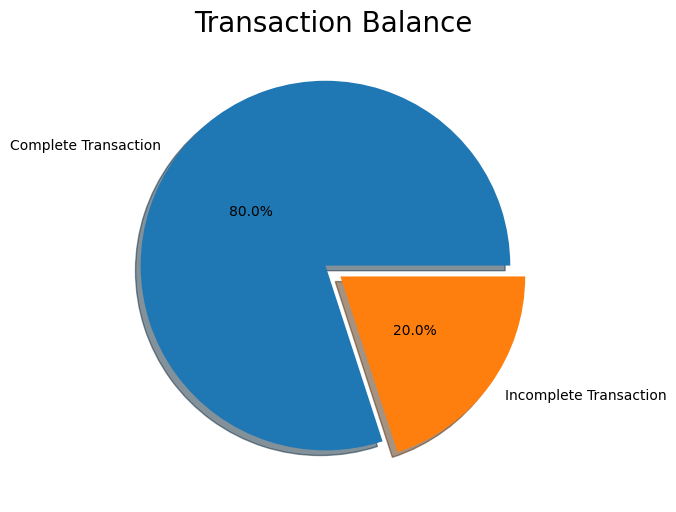

In [21]:
labels = ['Complete Transaction', 'Incomplete Transaction']
data = [df['Incomplete Transaction'].value_counts()[0],
         df['Incomplete Transaction'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(data, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True)
plt.title("Transaction Balance", fontsize=20)
plt.show()

#### **Report**
#### - The target classes are highly imbalanced
#### - Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
#### - If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 
#### - Hence we should handle imbalanced data with certain methods.


# Feature Engineering
#### in this section we will engineering a few features of the data that are not present in the original dataset.

## Total Discount Percentage 

In [22]:
df['Discount Percentage'] = ((df['Total Sales'] - df['Discounted Sales']) / df['Total Sales']) * 100

## Unique Items per total item Ratio:


In [23]:
df['Unique Items per Total Item'] = df['Unique Items'] / df['Total Items']


## Seasonality Indicator:

In [24]:
df['Month'] = pd.to_datetime(df['Date']).dt.month


## Drop columns

In [25]:
# drop useless columns for ML analysis ( we already used Date for getting the Month Feature)
#drop Customer ID , Transaction ID , Date
df.drop(columns=['Customer ID', 'Transaction ID','Date'], inplace=True)

In [26]:
df['Month']=df['Month'].astype(str)
df['Loyalty Card'] = df['Loyalty Card'].astype(str)

# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# numeric_features = ['Total Items', 'Unique Items', 'Total Sales', 'Discounted Sales', 'Browsing Duration (minutes)', 'Number of Clicks', 'Age', 'Household Income', 'Loyalty Points', "Discount Percentage", 'Unique Items per Total Item']
# categorical_features = [ 'Gender', 'Region', 'Marital Status', 'Education', 'Incomplete Transaction', 'Loyalty Card', 'Month']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['Total Items', 'Unique Items', 'Total Sales', 'Discounted Sales', 'Browsing Duration (minutes)', 'Number of Clicks', 'Incomplete Transaction', 'Age', 'Household Income', 'Loyalty Points', 'Discount Percentage', 'Unique Items per Total Item']

We have 6 categorical features : ['Gender', 'Region', 'Marital Status', 'Education', 'Loyalty Card', 'Month']


# EDA

## Correlation Matrix

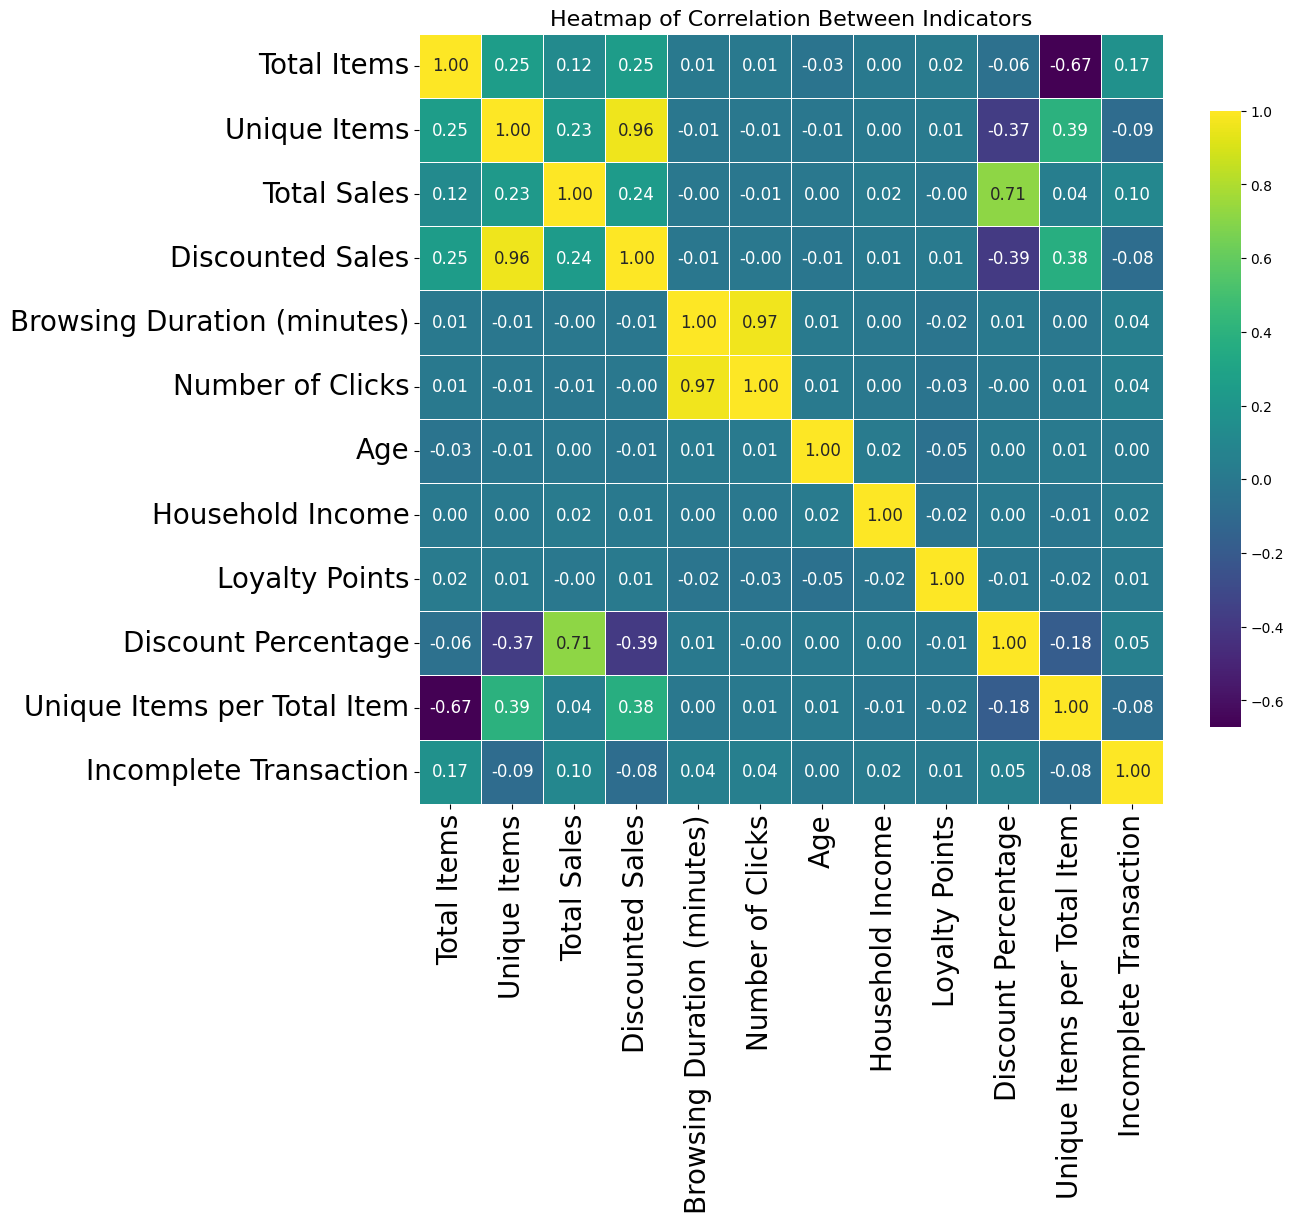

In [27]:
def generate_correlation_heatmap(dataframe):
    # Select only the numeric columns for correlation
    numeric_df = dataframe.select_dtypes(include=[np.number])

    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create a heatmap
    plt.figure(figsize=(12, 10))  # Make it bigger
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='viridis',  # A different color palette
                linewidths=.5,  # Add lines between squares
                fmt=".2f",  # Limit decimal points
                cbar_kws={"shrink": .8},
                annot_kws={'size': 12})  # Adjust color bar size

    plt.title('Heatmap of Correlation Between Indicators', fontsize=16)
    plt.xticks(fontsize=20)  # Reduce font size for x labels
    plt.yticks(fontsize=20)  # Reduce font size for y labels
    plt.show()

target = 'Incomplete Transaction'
generate_correlation_heatmap(pd.concat([df.drop(target,axis=1), df[target]],axis=1))

#### **Report**
#### - Number of clicks and the Browing Duration seems highly correlated also Discounted Sales unique items 
#### - We dropped Discounted Sales because we used it to calculate the discount percentage, and we dropped the Number of Clicks because its distribution is less normal compared to Browsing Duration. However, after a few experiments and training the model, the performance on the validation set was lower compared to before dropping these columns, so we decided to keep them.

## Variant Analysis  

In [28]:

# Loop through each categorical column
for column in categorical_features:
    # Calculate value counts for each category
    category_counts = df[column].value_counts()
    
    # Calculate total number of entries
    total_entries = len(df)
    
    # Calculate percentage of each category
    print(f"\n{column}:")
    for category, count in category_counts.items():
        percentage = (count / total_entries) * 100
        print(f"{category}: {percentage:.2f}%")



Gender:
Female: 51.12%
Male: 48.88%

Region:
Suburban: 50.88%
Urban: 24.96%
Rural: 24.16%

Marital Status:
Married: 43.68%
Single: 21.48%
Divorced: 20.04%
Widowed: 8.20%
Civil partnered: 6.60%

Education:
Graduate: 49.34%
High School: 26.16%
Post-Graduate: 16.36%

Loyalty Card:
0: 51.30%
1: 48.70%

Month:
1: 34.88%
3: 33.94%
2: 31.18%


## Bivariant analysis

### Bivariant analysis for categorical features
#### we will now examine each variable with respect to the Target Variable. First, we will identify the relationship between the Target Variable and the Categorical Features. Then we will look at the Numerical Features compared to the Target Variable. In this part, we will create 100% stacked bar and column charts showing the proportion of complete and incomplete transactions for each category of categorical features seprately

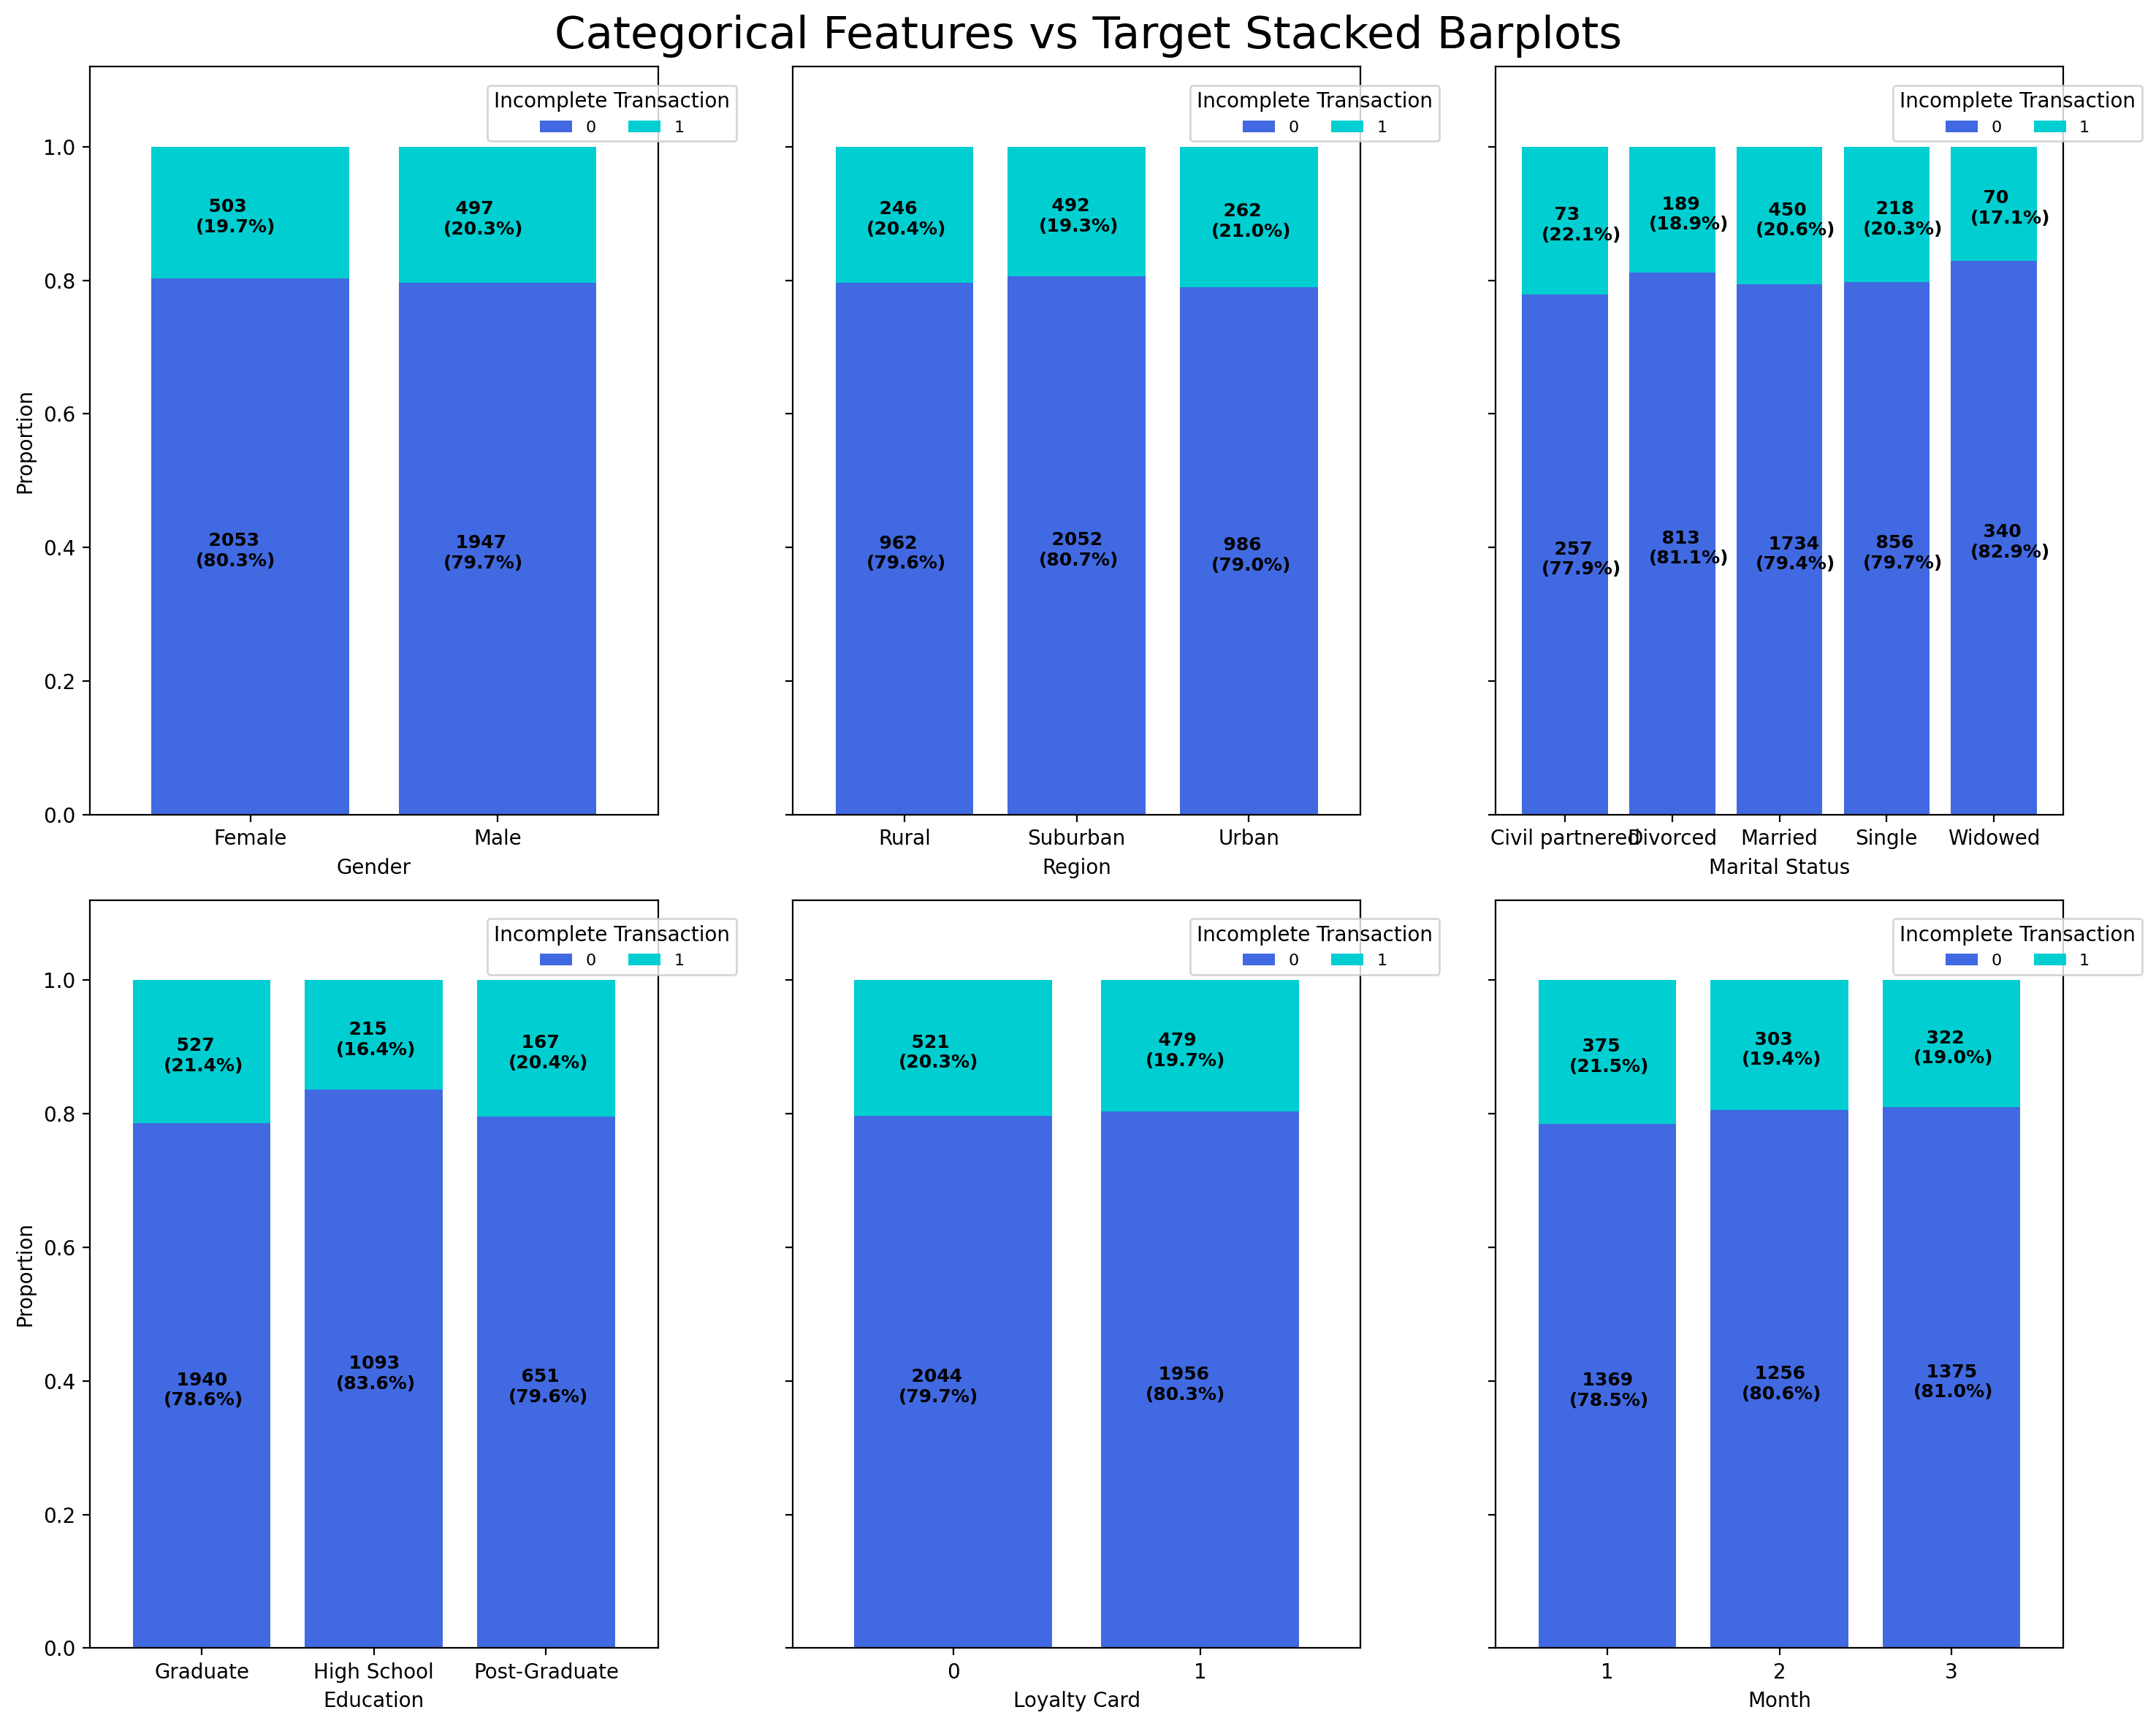

In [29]:
# Define a list containing the names of important categorical features in the dataset 
Cat_Features = ['Gender', 'Region', 'Marital Status', 'Education', 'Loyalty Card', 'Month']

# Define the target name in a variable for simplicity
Target = 'Incomplete Transaction'

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)

for i,col in enumerate(Cat_Features):
    
    # Create a cross tabulation showing the proportion of complete and incomplete for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['royalblue', 'darkturquoise'])
    
    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.22, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Incomplete Transaction', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
            

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

#### **Bivariate Analysis Report**

#### - The region of the customer (rural, urban) has no significant effect on the probability of completion of transactions.
#### - The gender of the customer has no significant effect on the probability of completion of transactions.
#### - The month of the purchase (January, February, March) seems to have no effect on the probability of completion of transactions.
#### - The probability of completing transactions for customers with a high school education seems to be higher compared to other education categories (graduate, post-graduate).
#### - The marital status of the customer, widows, and divorced individuals have a higher probability of completing their transactions.
#### - Having a loyalty card or not having it seems to have no effect on the completion of transactions.
#### - **Overall, no significant patterns were detected in the bivariate analysis plots indicating which categories of categorical variables have a direct effect on the probability of completion of transactions.**
#### - It seems like our machine learning algorithms will have a tough job distinguishing between complete and incomplete transactions.

### Bivariant analysis for numerical features


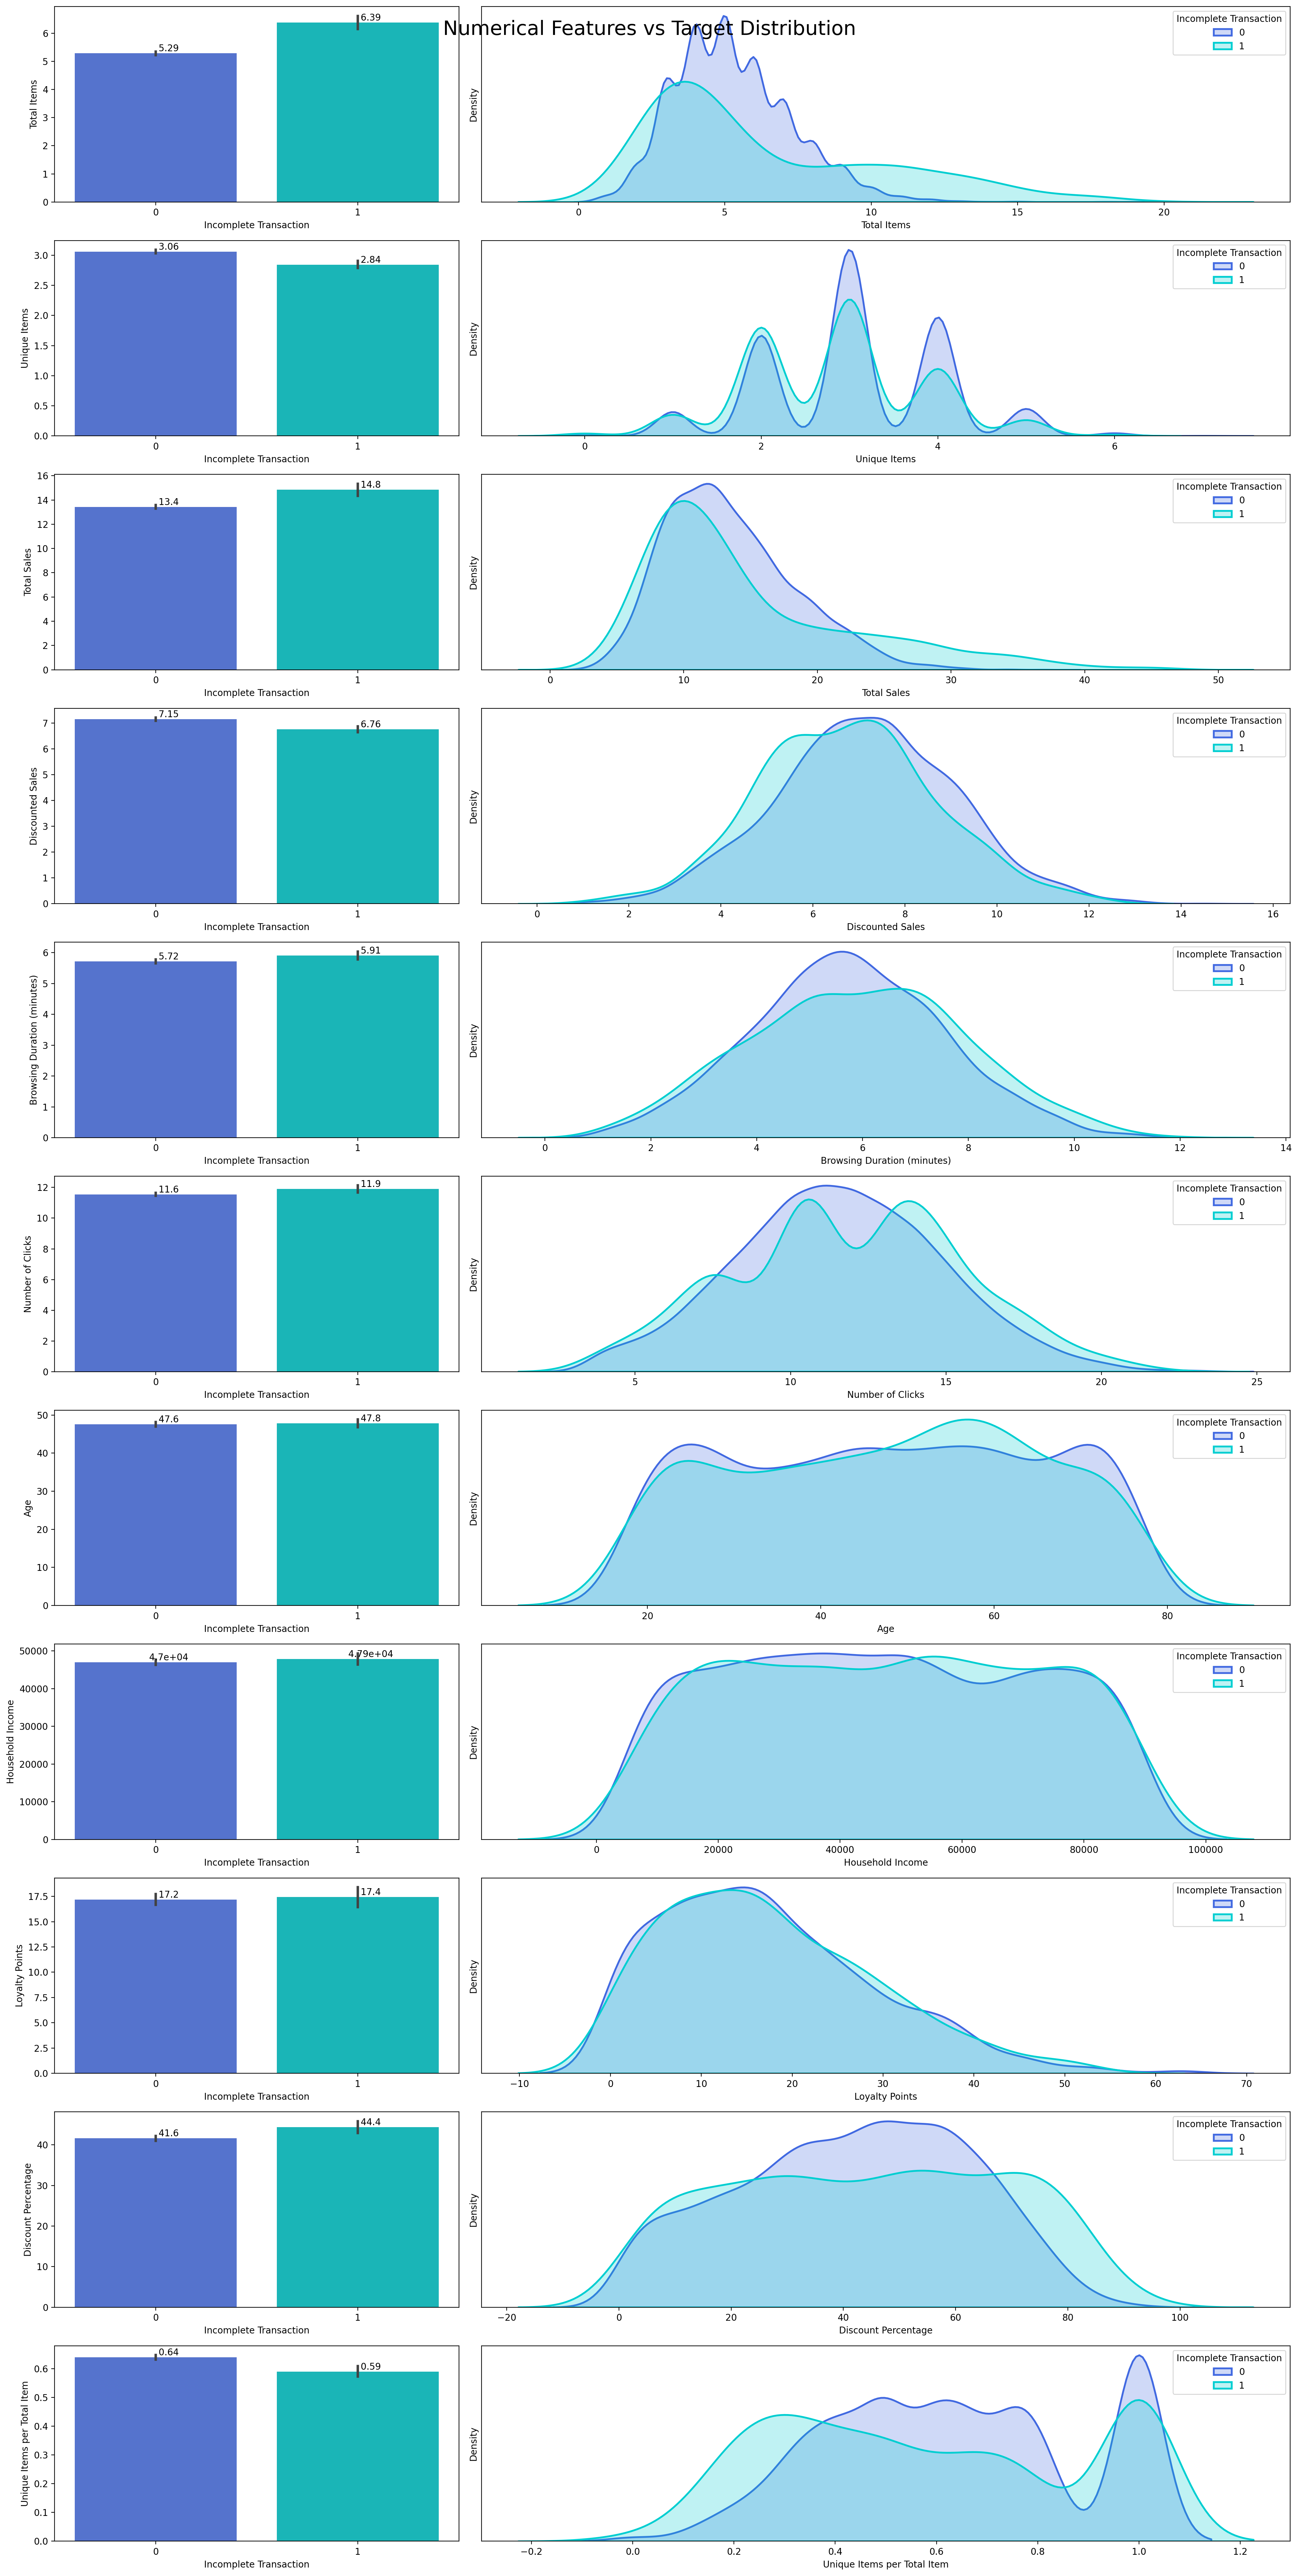

In [30]:
# Define a list containing the names of important numerical features in the dataset 
Num_Features = ['Total Items', 'Unique Items', 'Total Sales', 'Discounted Sales', 'Browsing Duration (minutes)', 'Number of Clicks', 'Age', 
                'Household Income', 'Loyalty Points', 'Discount Percentage', 'Unique Items per Total Item']


sns.set_palette(['royalblue', 'darkturquoise'])

fig, ax = plt.subplots(11, 2, figsize=(20,40), dpi=200, gridspec_kw={'width_ratios': [1, 2]})


for i,col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=df[df[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Incomplete Transaction', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

#### **again, no significant patterns were detected in the bivariate analysis plots**


# Outliers 

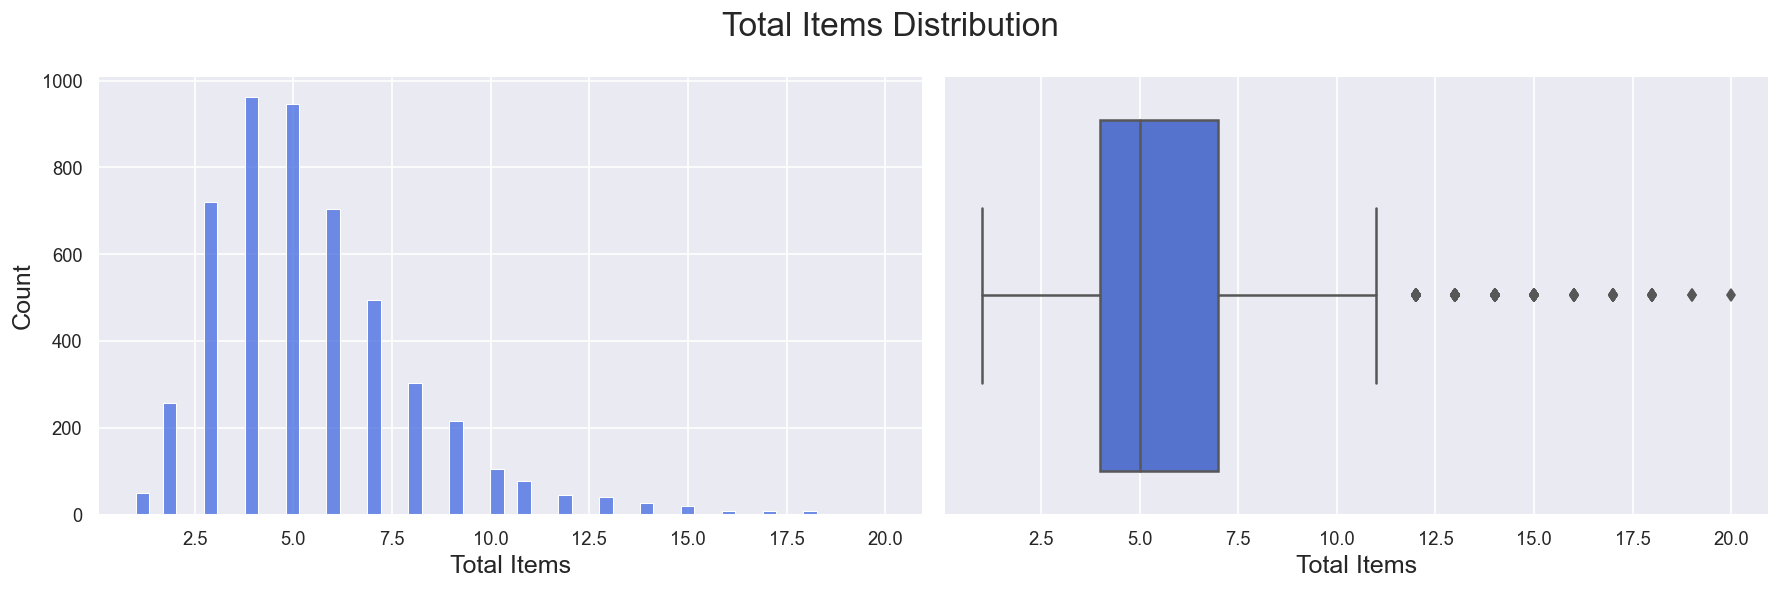

Outliers count in 'Total Items': 76


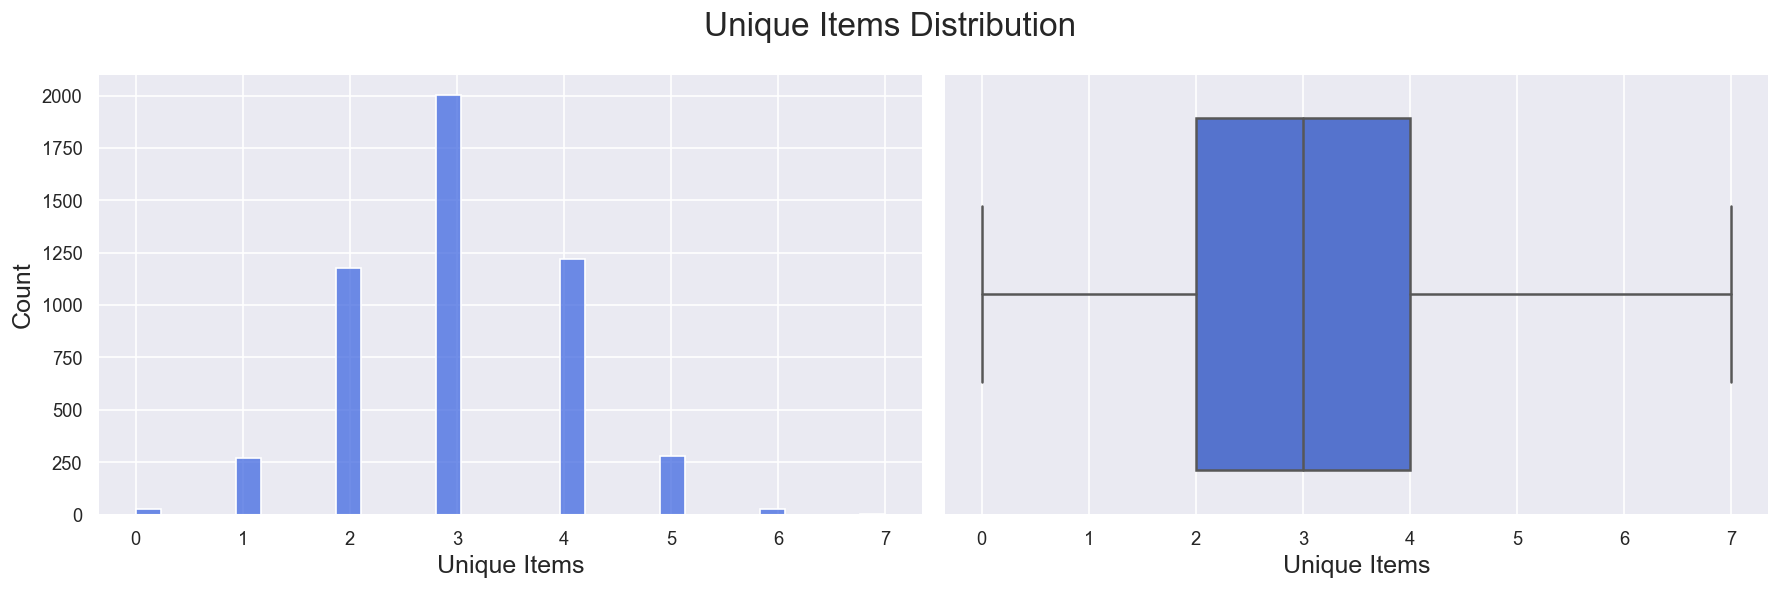

Outliers count in 'Unique Items': 1


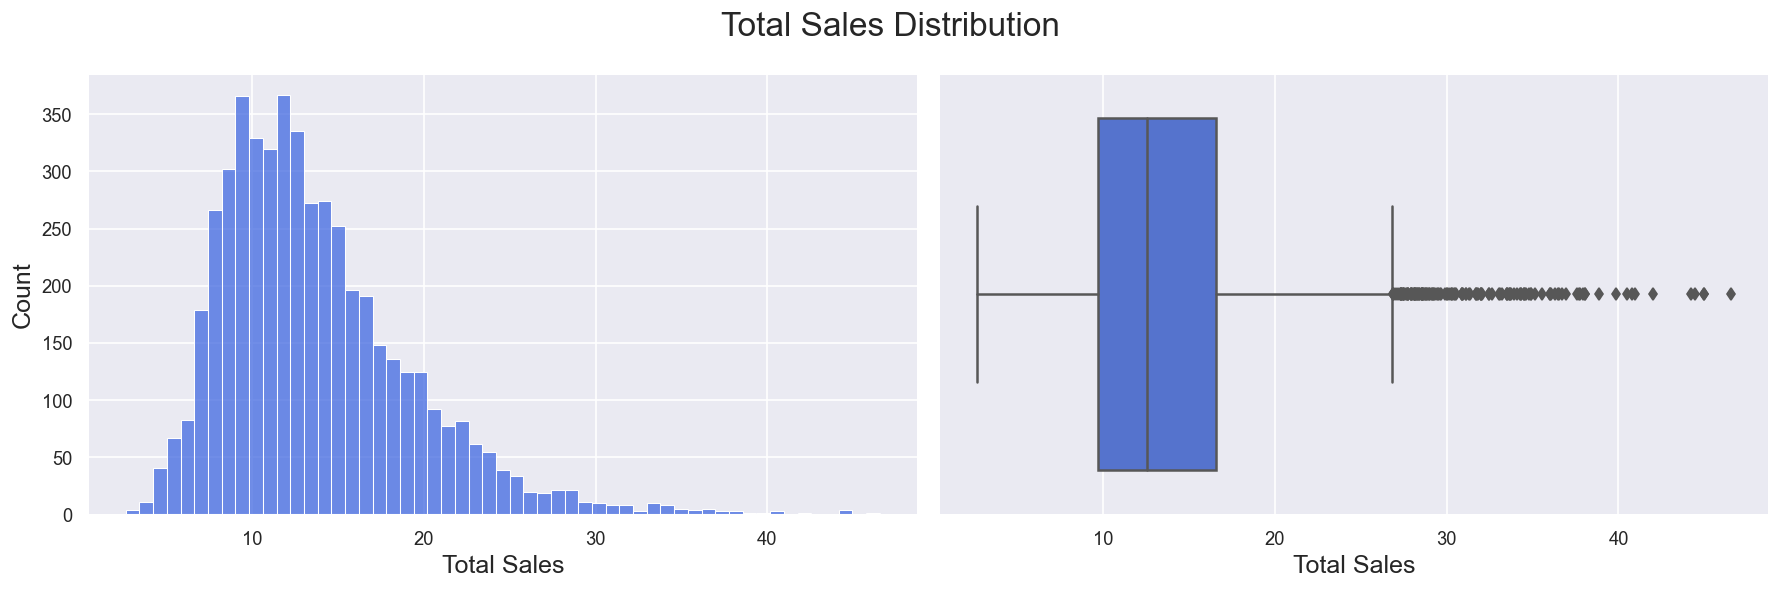

Outliers count in 'Total Sales': 68


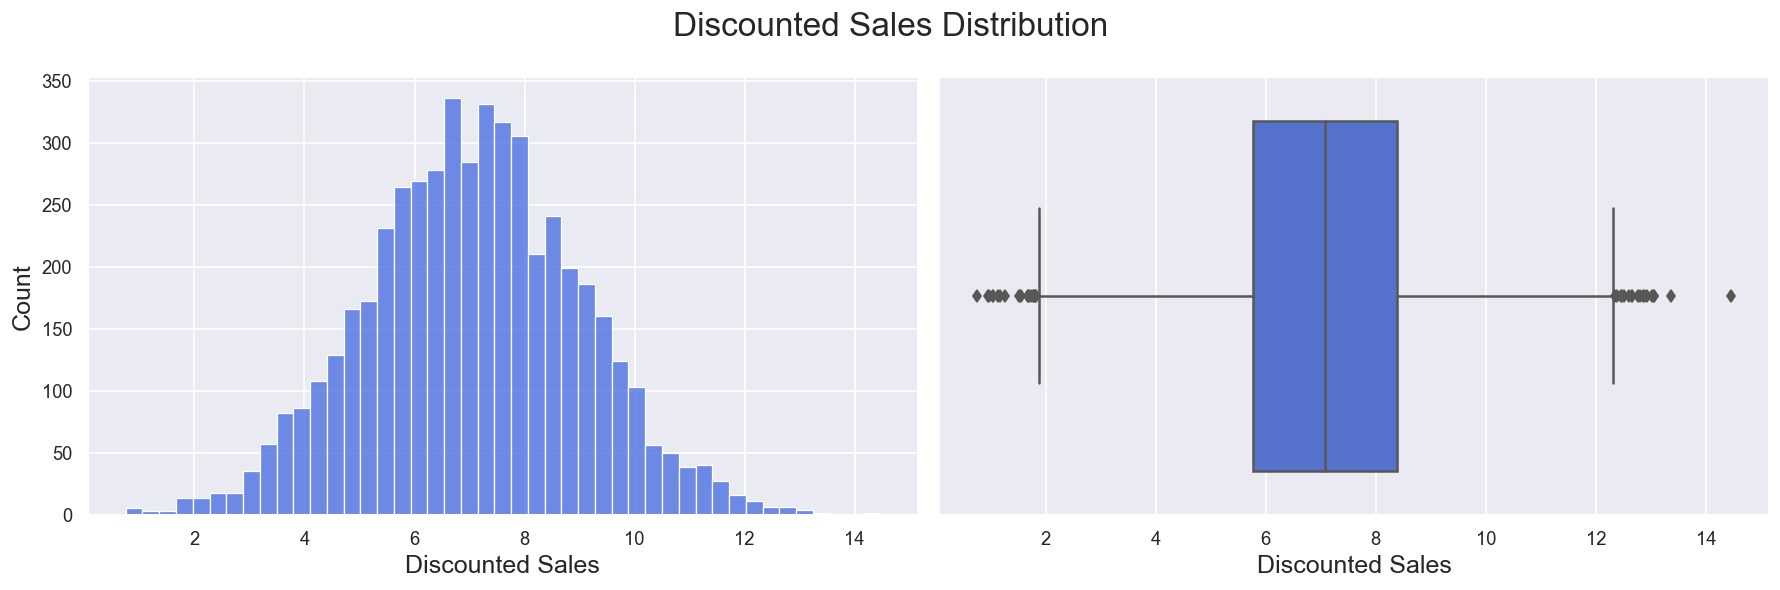

Outliers count in 'Discounted Sales': 6


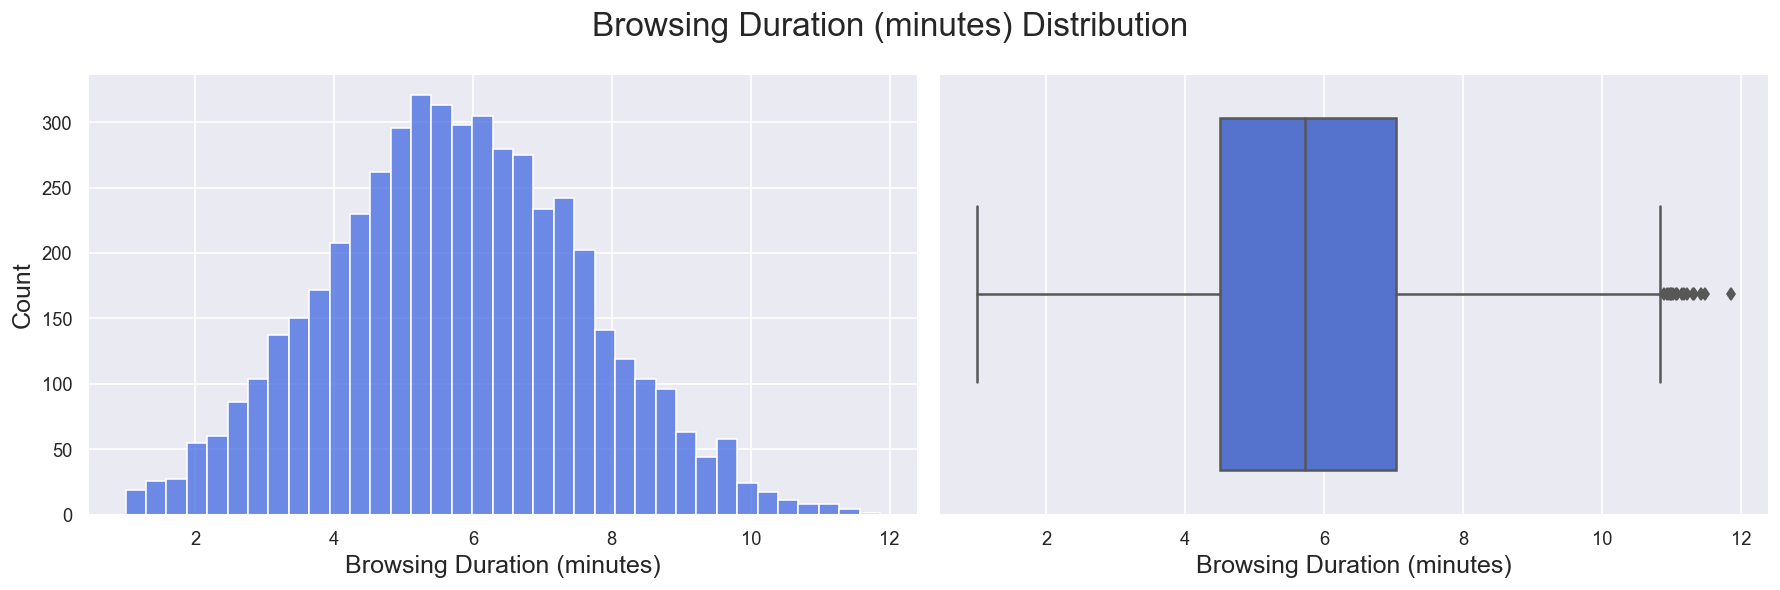

Outliers count in 'Browsing Duration (minutes)': 3


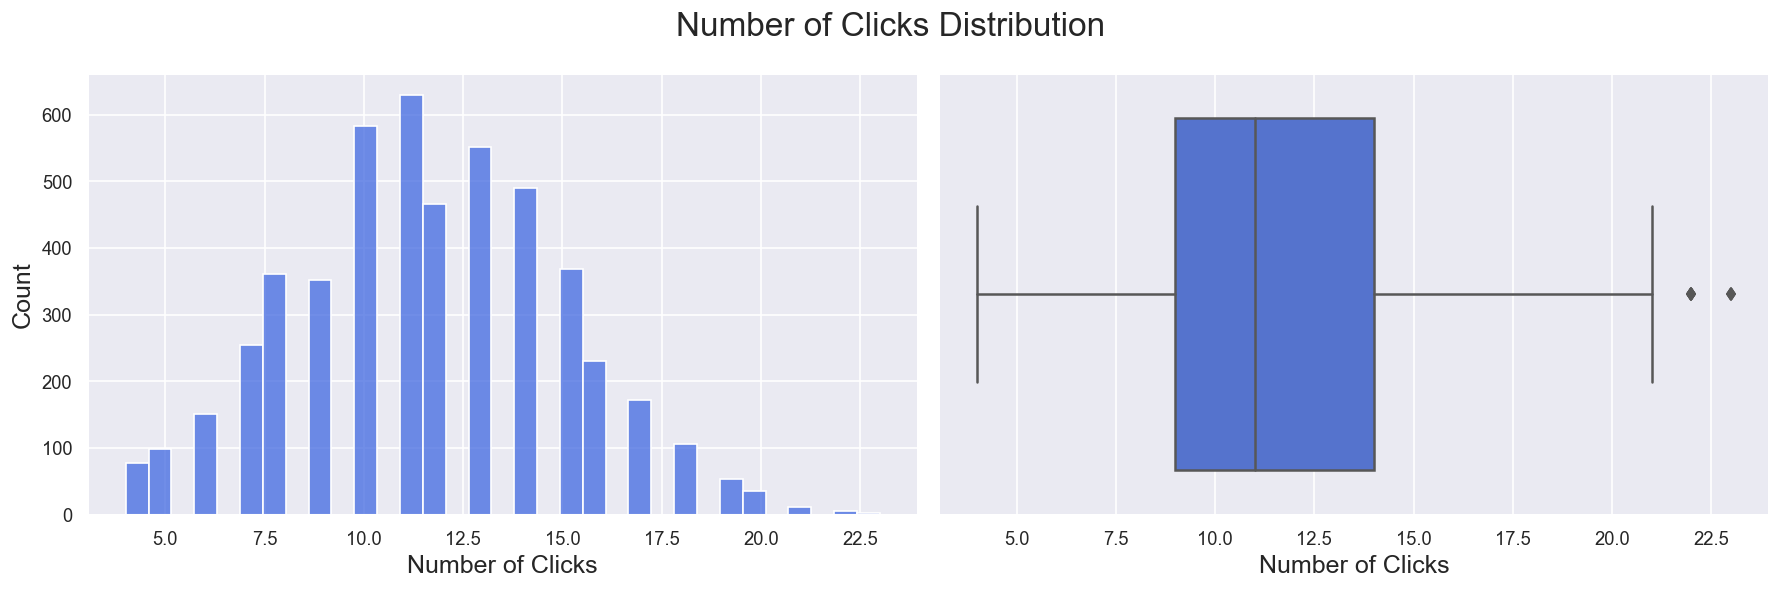

Outliers count in 'Number of Clicks': 8


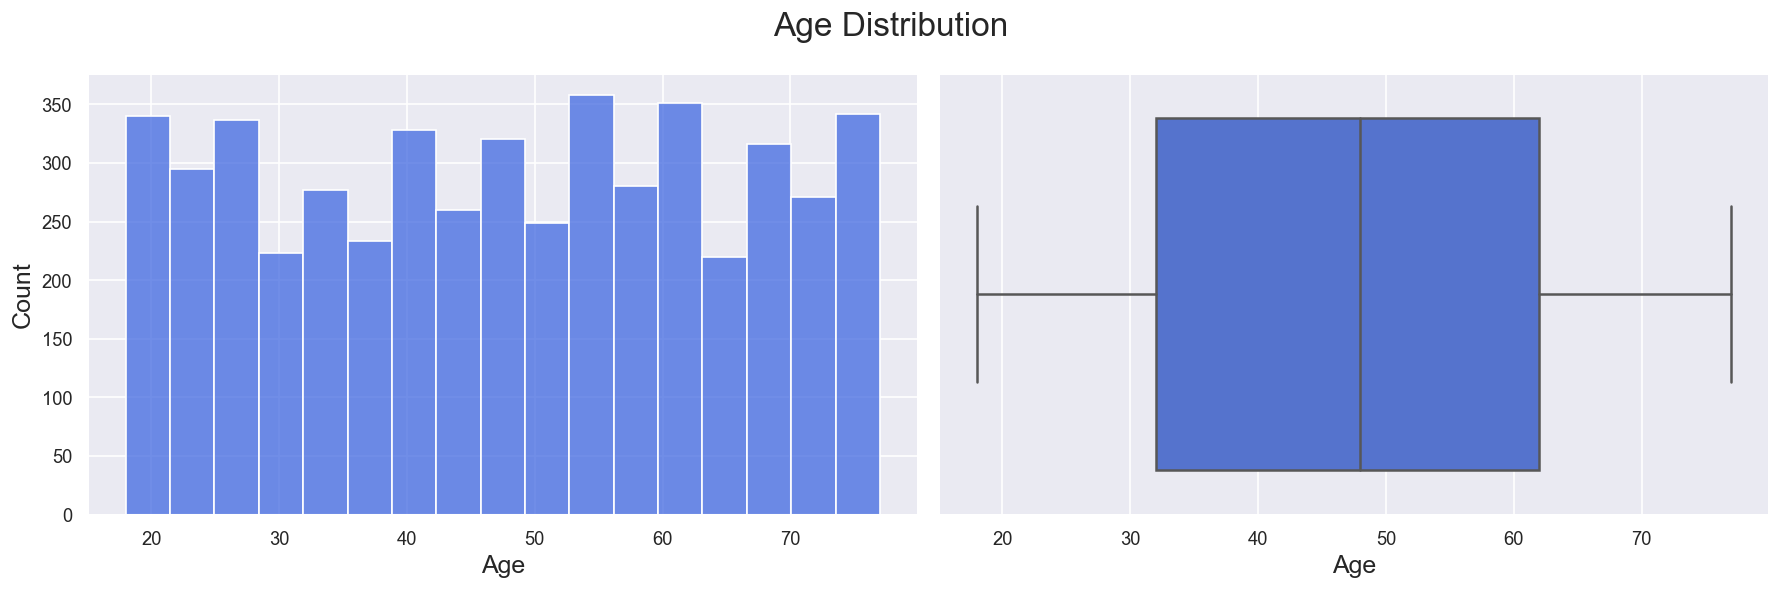

Outliers count in 'Age': 0


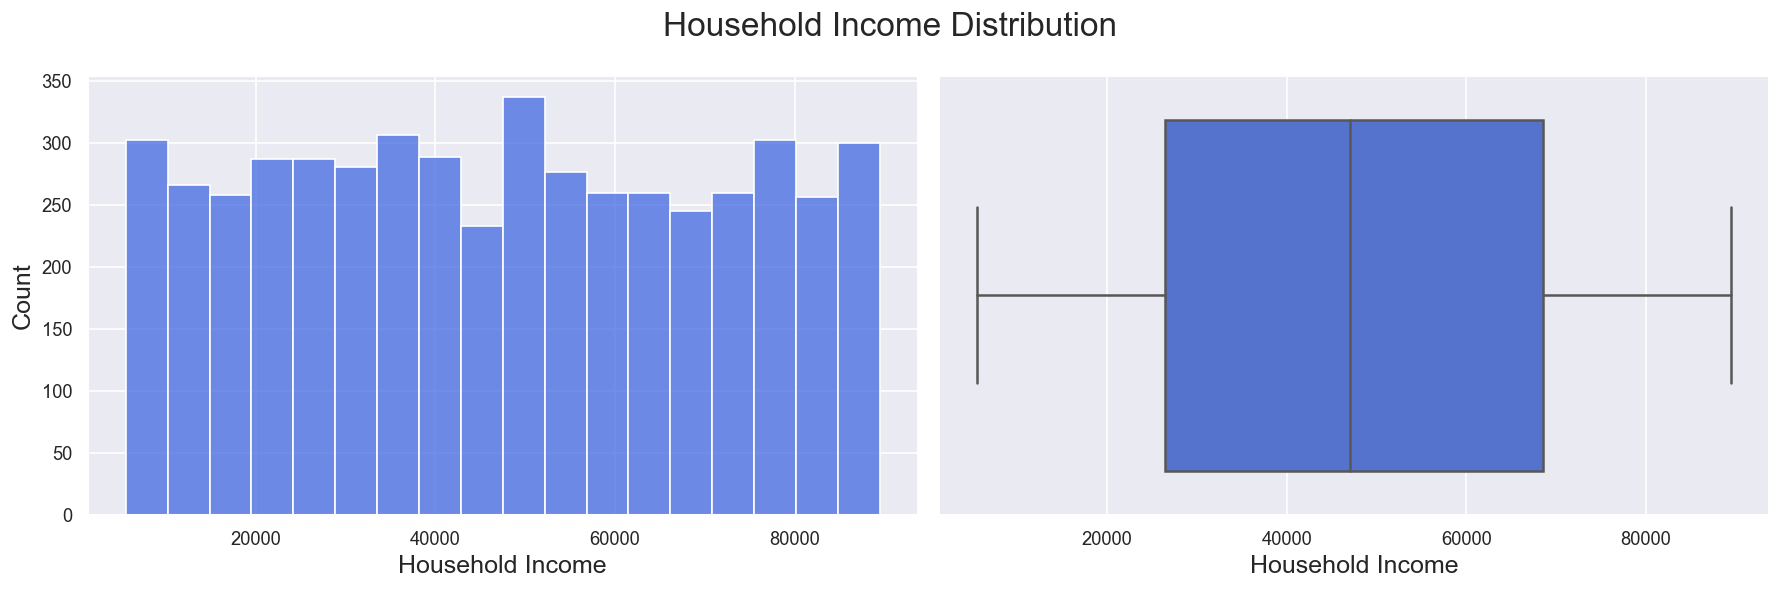

Outliers count in 'Household Income': 0


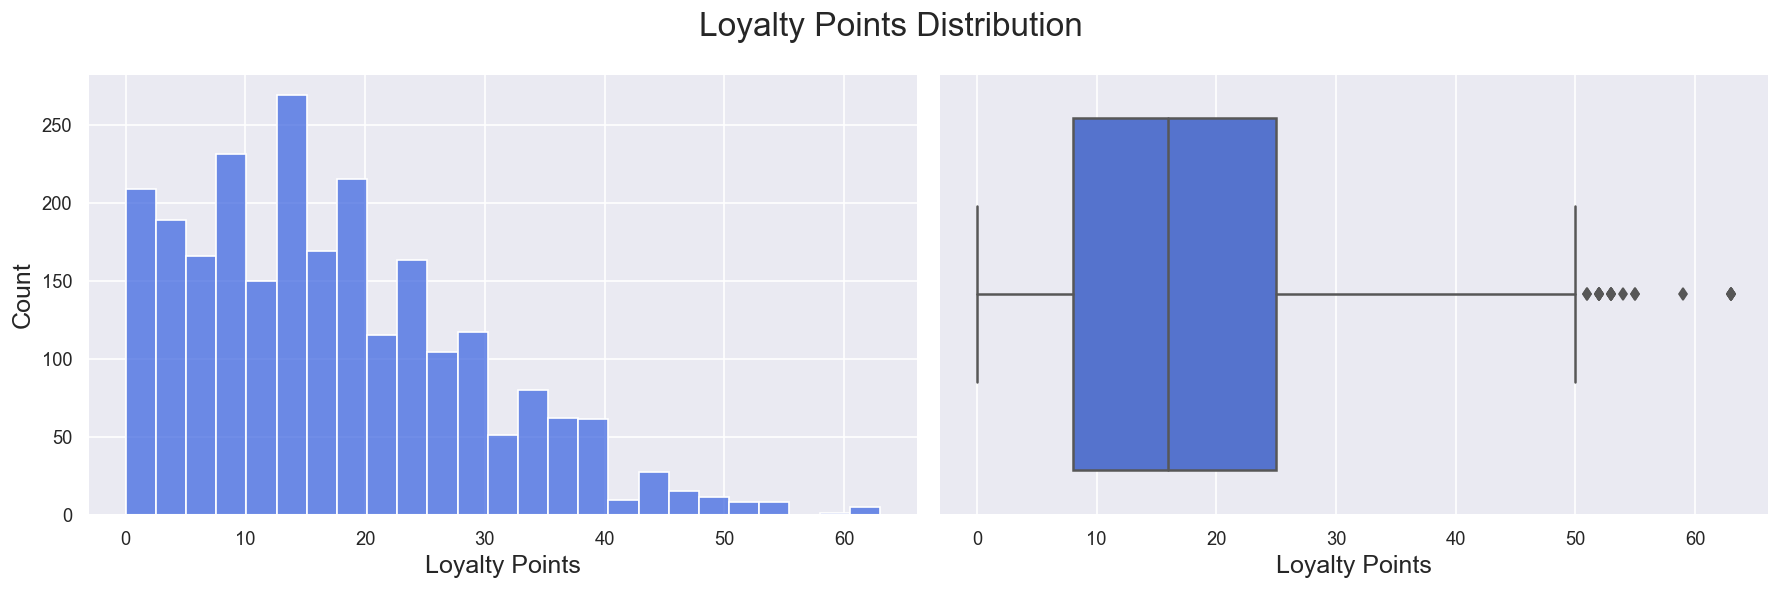

Outliers count in 'Loyalty Points': 0


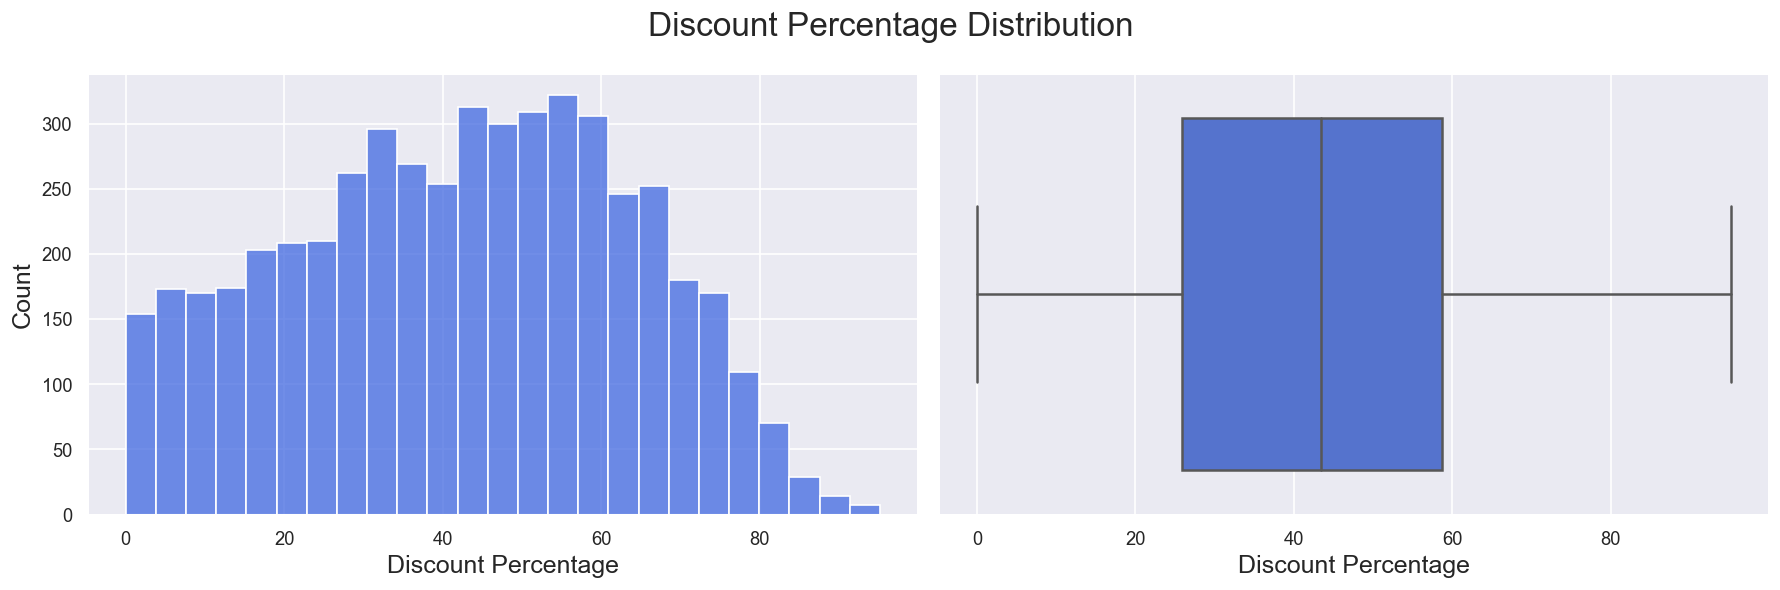

Outliers count in 'Discount Percentage': 0


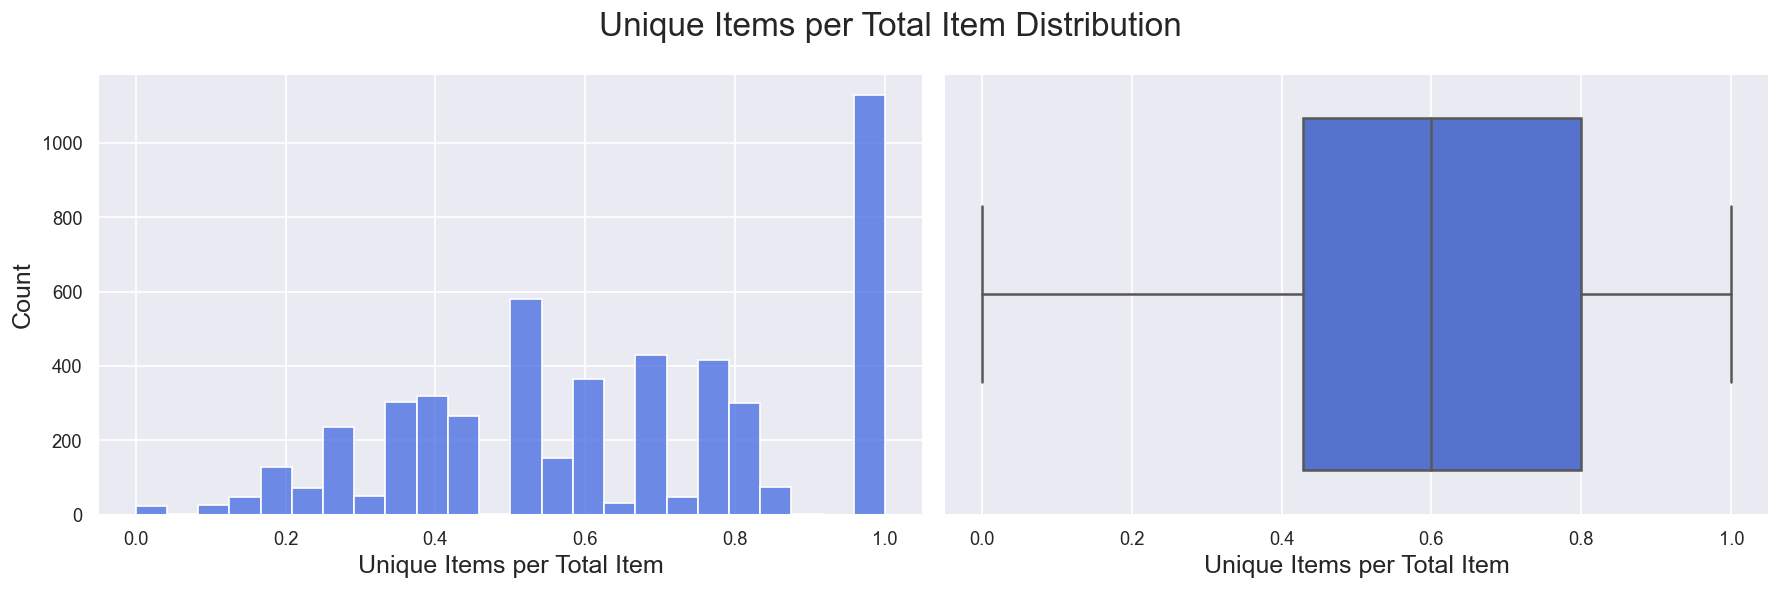

Outliers count in 'Unique Items per Total Item': 0


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'df' is your dataframe

Num_Features = ['Total Items', 'Unique Items', 'Total Sales', 'Discounted Sales', 'Browsing Duration (minutes)', 'Number of Clicks', 'Age', 
                'Household Income', 'Loyalty Points', 'Discount Percentage', 'Unique Items per Total Item']

# Set label size for axes
sns.set(rc={'axes.labelsize': 15})

# Iterate over each numerical column
for column in df[Num_Features].columns:
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=120)
    
    # Histogram
    sns.histplot(x=column, data=df, color='royalblue', ax=ax[0])
    
    # Boxplot
    sns.boxplot(x=column, data=df, color='royalblue', ax=ax[1])
    
    # Title
    plt.suptitle(f'{column} Distribution', fontsize=20)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()
    
    # Outlier detection
    outliers_count = df[stats.zscore(df[column]) > 3][column].count()
    print(f"Outliers count in '{column}': {outliers_count}")


# Model Development

## Split the data 

#### The approach to train test split when dealing with imbalanced datasets is to use stratification.  Stratification is an important step in splitting imbalanced datasets into training and test sets. Stratification ensures that the proportion of each class remains the same across both the training and test sets.

In [32]:
# Splitting X and y for all Experiments
X= df.drop('Incomplete Transaction', axis=1)
y = df['Incomplete Transaction']

In [33]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.15, random_state = 42)
X_train.shape, X_test.shape

((4250, 17), (750, 17))

## Preprocessing

### Purpose
#### The purpose of this process is to preprocess the input data by applying specific transformations tailored to different types of features. Numerical features require imputation and scaling, while categorical features need imputation and one-hot encoding. By creating a unified preprocessing pipeline using Column Transformer, we can streamline the preprocessing workflow and ensure consistency in data transformations.

### Steps
1. **Feature Selection**:
   - Numerical Features: Identified using the `select_dtypes` function with the parameter `exclude="object"`.
   - Categorical Features: Identified using the `select_dtypes` function with the parameter `include="object"`.
2. **Pipeline Definition**:
   - **Numeric Processor Pipeline**: Defines a pipeline for processing numerical features consisting of two steps:
     - Imputation: Missing values are imputed using the mean strategy.
     - Scaling: Features are scaled using standard scaling.
   - **Categorical Processor Pipeline**: Defines a pipeline for processing categorical features consisting of two steps:
     - Imputation: Missing values are imputed using the most frequent strategy.
     - One-Hot Encoding: Categorical features are encoded using one-hot encoding, ignoring unknown categories.
3. **Column Transformer**:
   - Combines the numeric and categorical processor pipelines into a single preprocessing step.
   - The `ColumnTransformer` applies the specified transformations to the corresponding feature types (numerical or categorical).
4. **Result**:
   - `preprocessor`: A Column Transformer object containing the combined preprocessing pipelines for both numerical and categorical features.


In [150]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# print columns
print('We have {} numerical features : {}'.format(len(num_features), num_features))
print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))


# Define a pipeline for processing numeric features
numeric_processor = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='mean')),
        ("scaler", StandardScaler())
    ]
)

# Define a pipeline for processing categorical features
categorical_processor = Pipeline(
    steps=[
        ("Imputer", SimpleImputer(strategy='most_frequent')),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
        
    ]
)

# Combine numeric and categorical processors
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numeric_processor, num_features), 
        ("categorical", categorical_processor, cat_features) 
    ]
)

We have 11 numerical features : Index(['Total Items', 'Unique Items', 'Total Sales', 'Discounted Sales',
       'Browsing Duration (minutes)', 'Number of Clicks', 'Age',
       'Household Income', 'Loyalty Points', 'Discount Percentage',
       'Unique Items per Total Item'],
      dtype='object')

We have 6 categorical features : Index(['Gender', 'Region', 'Marital Status', 'Education', 'Loyalty Card',
       'Month'],
      dtype='object')


## Model and Parameters


### Purpose
#### The purpose of this section is to establish a set of machine learning models along with their hyperparameters, facilitating systematic experimentation and optimization of models for predictive tasks.

### Models
#### The following machine learning models are defined:

- **RandomForestClassifier**: A classifier based on random forests, consisting of multiple decision trees.
- **DecisionTreeClassifier**: A classifier based on decision trees.
- **GradientBoostingClassifier**: A classifier that builds an ensemble of decision trees in a gradient-boosted framework.
- **LogisticRegression**: A linear classifier for binary classification tasks.
- **KNeighborsClassifier**: A classifier that assigns labels to data points based on the majority vote of their nearest neighbors.
- **XGBClassifier**: A gradient boosting classifier implemented in the XGBoost library.
- **CatBoostClassifier**: A gradient boosting classifier implemented in the CatBoost library.
- **AdaBoostClassifier**: A classifier that builds an ensemble of weak learners in an adaptive boosting framework.
- **SVC**: A support vector classifier for binary and multiclass classification tasks.

### Hyperparameter Grids
#### For each model, a corresponding hyperparameter grid is defined, specifying various values to be explored during model training and optimization. The hyperparameters are tuned using techniques such as grid search to identify the optimal configuration for each model.

Note: 'default' values indicate that the default hyperparameter settings provided by the respective libraries will be used.

Please refer to the code documentation or the scikit-learn documentation for detailed information on each model and its hyperparameters.


In [19]:
#Define models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoostClassifier": CatBoostClassifier(verbose=False),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "SVC": SVC()
}

param_grids = {
    "RandomForestClassifier": {
        "randomforestclassifier__n_estimators": [100, 200, 300, 'default'],
        "randomforestclassifier__max_depth": [None, 10, 20, 'default'],
        "randomforestclassifier__min_samples_split": [2, 5, 10, 'default'],
        "randomforestclassifier__min_samples_leaf": [1, 2, 4, 'default'],
        "randomforestclassifier__bootstrap": [True, False, 'default']
    },
    "DecisionTreeClassifier": {
        "decisiontreeclassifier__max_depth": [None, 10, 20, 'default'],
        "decisiontreeclassifier__min_samples_split": [2, 5, 10, 'default'],
        "decisiontreeclassifier__min_samples_leaf": [1, 2, 4, 'default']
    },
    "GradientBoostingClassifier": {
        "gradientboostingclassifier__n_estimators": [100, 200, 300, 'default'],
        "gradientboostingclassifier__learning_rate": [0.05, 0.1, 0.2, 'default'],
        "gradientboostingclassifier__max_depth": [3, 5, 7, 'default'],
        "gradientboostingclassifier__min_samples_split": [2, 5, 10, 'default'],
        "gradientboostingclassifier__min_samples_leaf": [1, 2, 4, 'default']
    },
    "LogisticRegression": {
        "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100, 'default'],
        "logisticregression__penalty": ['l1', 'l2', 'default']
    },
    "KNeighborsClassifier": {
        "kneighborsclassifier__n_neighbors": [3, 5, 7, 9, 'default'],
        "kneighborsclassifier__weights": ['uniform', 'distance', 'default'],
        "kneighborsclassifier__metric": ['euclidean', 'manhattan', 'default']
    },
    "XGBClassifier": {
        "xgbclassifier__n_estimators": [100, 200, 300, 'default'],
        "xgbclassifier__max_depth": [3, 5, 7, 'default'],
        "xgbclassifier__learning_rate": [0.05, 0.1, 0.2, 'default'],
        "xgbclassifier__subsample": [0.6, 0.8, 1.0, 'default'],
        "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0, 'default'],
        "xgbclassifier__reg_alpha": [0, 0.001, 0.01, 0.1, 'default'],
        "xgbclassifier__reg_lambda": [0, 0.001, 0.01, 0.1, 'default']
    },
    "CatBoostClassifier": {
        "catboostclassifier__iterations": [100, 200, 300, 'default'],
        "catboostclassifier__learning_rate": [0.03, 0.1, 0.2, 'default'],
        "catboostclassifier__depth": [4, 6, 8, 'default'],
        "catboostclassifier__l2_leaf_reg": [1, 3, 5, 7, 9, 'default']
    },
    "AdaBoostClassifier": {
        "adaboostclassifier__n_estimators": [50, 100, 200, 'default'],
        "adaboostclassifier__learning_rate": [0.01, 0.05, 0.1, 0.2, 'default']
    },
    "SVC": {
        "svc__C": [0.1, 1, 10, 'default'],
        "svc__kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'default'],
        "svc__gamma": ['scale', 'auto', 'default']
    }
}

## Train models

### Purpose
#### The purpose of this function is to streamline the process of model evaluation, including hyperparameter tuning, performance assessment, and model persistence. By automating these tasks, it enables efficient comparison of different models and facilitates reproducibility.

### Parameters
- `models`: A dictionary containing the names and instances of machine learning models to be evaluated.
- `X_train`: The feature matrix of the training dataset.
- `y_train`: The target variable of the training dataset.
- `X_test`: The feature matrix of the testing dataset.
- `y_test`: The target variable of the testing dataset.
- `preprocessor`: The ColumnTransformer object for preprocessing the data.
- `balancer`: An optional data balancing technique applied to address class imbalance.
- `param_grids`: A dictionary containing hyperparameter grids for each model.
- `kf`: The cross-validation strategy, typically a KFold or StratifiedKFold object.
- `scoring`: The evaluation metric used for model selection and assessment.
- `save_models`: A boolean flag indicating whether to save the best models to disk (default: `False`).
- `output_directory`: The directory path where the saved models will be stored (required if `save_models` is `True`).

### Output
#### The function returns a dictionary containing evaluation results for each model, including best hyperparameters, scores, and performance metrics on both training and testing datasets.




In [152]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor, balancer, param_grids,kf, scoring, save_models=False, output_directory=None):
    """
        ### Purpose
        The purpose of this function is to streamline the process of model evaluation, including hyperparameter tuning, performance assessment,
          and model persistence. By automating these tasks, it enables efficient comparison of different models and facilitates reproducibility.

        ### Parameters
        - `models`: A dictionary containing the names and instances of machine learning models to be evaluated.
        - `X_train`: The feature matrix of the training dataset.
        - `y_train`: The target variable of the training dataset.
        - `X_test`: The feature matrix of the testing dataset.
        - `y_test`: The target variable of the testing dataset.
        - `preprocessor`: The ColumnTransformer object for preprocessing the data.
        - `balancer`: An optional data balancing technique applied to address class imbalance.
        - `param_grids`: A dictionary containing hyperparameter grids for each model.
        - `kf`: The cross-validation strategy, typically a KFold or StratifiedKFold object.
        - `scoring`: The evaluation metric used for model selection and assessment.
        - `save_models`: A boolean flag indicating whether to save the best models to disk (default: `False`).
        - `output_directory`: The directory path where the saved models will be stored (required if `save_models` is `True`).

        ### Output
        The function returns a dictionary containing evaluation results for each model, including best hyperparameters, scores, and performance metrics on both training and testing datasets.
    """
    results = {}

    for model_name, model in models.items():
        pipe = make_pipeline(preprocessor, balancer, model)

        # Perform grid search
        grid_search = GridSearchCV(pipe, param_grid =param_grids[model_name], cv=kf, scoring=scoring, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model and its hyperparameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        classifier_step_key = model_name.lower()
        print(best_model.named_steps.keys())
        # Apply ColumnTransformer to the test data
        X_test_transformed = best_model.named_steps['columntransformer'].transform(X_test)
        # Use the transformed test data to make predictions using the classifier step
        y_test_pred = best_model.named_steps[classifier_step_key].predict(X_test_transformed)
        #y_test_pred = best_model.named_steps['columntransformer',classifier_step_key].predict(X_test) # avoid data leakage and sampling on test set by only using classifier step 

        # Evaluate Train and Test dataset
        train_acc, train_f1 , train_precision, train_recall, train_roc_au = evaluate_clf(y_train, y_train_pred)
        test_acc, test_f1 , test_precision, test_recall, test_roc_au = evaluate_clf(y_test, y_test_pred)

        #store results in dictionary
        results[model_name] = {
            'Best Hyperparameters': best_params,
            'Best Score': best_score,
            'Train Accuracy': train_acc,
            'Train F1 Score': train_f1,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train Roc Auc': train_roc_au,
            'Test Accuracy': test_acc,
            'Test F1 Score': test_f1,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test Roc Auc': test_roc_au
        }

        # Save the best model to the specified directory if specified
        if save_models and output_directory:
            current_datetime = datetime.now().strftime("%Y%m%d_%H%M%S")
            model_filename = f"{model_name.replace(' ', '_')}_{current_datetime}_best_model.joblib"
            model_filepath = os.path.join(output_directory, model_filename)
            joblib.dump(best_model, model_filepath)
            results[model_name]['Saved Model Filepath'] = model_filepath

    return results


## Dealing with Unbalanced Data

#### In this stage, we will first train a Gradiant Boosting Classifier model using different data balancing strategies to deal with imbalance in the data. 

#### This will help us choose the most effective method to address this aspect of our data.


# Gradiant Boosting Classifier

In [30]:
models = { "GradientBoostingClassifier": GradientBoostingClassifier() }

param_grids = {
"GradientBoostingClassifier": {
    "gradientboostingclassifier__n_estimators": [100, 200, 300, 'default'],
    "gradientboostingclassifier__learning_rate": [0.05, 0.1, 0.2, 'default'],
    "gradientboostingclassifier__max_depth": [3, 5, 7, 'default'],
    "gradientboostingclassifier__min_samples_split": [2, 5, 10, 'default'],
}
}

save_models =False
output_directory =r"research\notebook_models"
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 
scoring= "f1"


### Random undersampler
Under-sampling: Decrease the number of instances in the majority class by randomly removing examples

In [31]:
balancer = RandomUnderSampler(random_state=42)
results_RandomUnderSampler= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                 kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'randomundersampler', 'gradientboostingclassifier'])


In [39]:
# each model is a row and each metric is a column
results_RandomUnderSampler_df = pd.DataFrame.from_dict(results_RandomUnderSampler, orient='index')
results_RandomUnderSampler_df['Best Score']

GradientBoostingClassifier    0.518088
Name: Best Score, dtype: float64

### Random Oversampler
Increase the number of instances in the minority class by generating random instances from minority calss.

In [33]:
balancer = RandomOverSampler(random_state=42)
results_RandomOverSampler= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                 kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'randomoversampler', 'gradientboostingclassifier'])


In [38]:
# each model is a row and each metric is a column
results_RandomOverSampler_df = pd.DataFrame.from_dict(results_RandomOverSampler, orient='index')
results_RandomOverSampler_df['Best Score'] 

GradientBoostingClassifier    0.533661
Name: Best Score, dtype: float64

### SMOTE sampler
Generate synthetic data points for the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling).

In [35]:
balancer = SMOTE(random_state=42)
results_SMOTE= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                 kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'smote', 'gradientboostingclassifier'])


In [37]:
# each model is a row and each metric is a column
results_SMOTE_df = pd.DataFrame.from_dict(results_SMOTE, orient='index')
results_SMOTE_df['Best Score']

GradientBoostingClassifier    0.485134
Name: Best Score, dtype: float64

### SMOTETomek method
This method combines the oversampling technique of SMOTE (Synthetic Minority Over-sampling Technique) with the undersampling technique of Tomek links to achieve better class balance in the dataset. 

In [40]:
balancer = SMOTETomek(random_state=42)
results_SMOTETomek= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                 kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'smotetomek', 'gradientboostingclassifier'])


In [41]:
# each model is a row and each metric is a column
results_SMOTETomek_df = pd.DataFrame.from_dict(results_SMOTETomek, orient='index')
results_SMOTETomek_df['Best Score']

GradientBoostingClassifier    0.482014
Name: Best Score, dtype: float64

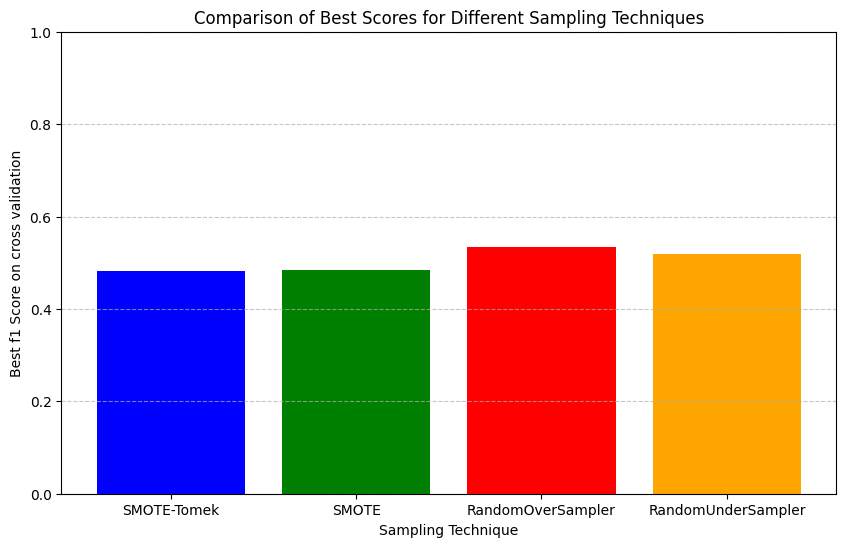

In [49]:
import matplotlib.pyplot as plt

# Data
sampling_techniques = ['SMOTE-Tomek', 'SMOTE', 'RandomOverSampler', 'RandomUnderSampler']
best_scores = [results_SMOTETomek_df['Best Score'].max(),
               results_SMOTE_df['Best Score'].max(),
               results_RandomOverSampler_df['Best Score'].max(),
               results_RandomUnderSampler_df['Best Score'].max()]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(sampling_techniques, best_scores, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Sampling Technique')
plt.ylabel('Best f1 Score on cross validation')
plt.title('Comparison of Best Scores for Different Sampling Techniques')
plt.ylim(0, 1)  # Set y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Dealing with Unbalanced Data Conclusion

#### As we can see from the above analysis, the GBM classifier gave us better results in terms of F1 score (cross-validation score) for the RandomOverSampling method (0.53) compared to the other methods.

#### Therefore, we choose this method for dealing with imbalance in our data. In the next stage, we will resample our training data with this method and use grid search CV to select the best machine learning algorithm with optimal hyperparameters for our task.

# Choosing Best ML Model By Grid Search CV

In [153]:
#Define models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "AdaBoostClassifier": AdaBoostClassifier(),
    "SVC": SVC()
}


param_grids = {
    "RandomForestClassifier": {
        "randomforestclassifier__n_estimators": [100, 200, 300, 'default'],
        "randomforestclassifier__max_depth": [None, 10, 20, 'default'],
        "randomforestclassifier__min_samples_split": [2, 5, 10, 'default'],
    },
    "DecisionTreeClassifier": {
        "decisiontreeclassifier__max_depth": [None, 10, 20, 'default'],
        "decisiontreeclassifier__min_samples_split": [2, 5, 10, 'default'],
        "decisiontreeclassifier__min_samples_leaf": [1, 2, 4, 'default']
    },
    "GradientBoostingClassifier": {
        "gradientboostingclassifier__n_estimators": [100, 200, 300, 'default'],
        "gradientboostingclassifier__learning_rate": [0.05, 0.1, 0.2, 'default'],
        "gradientboostingclassifier__max_depth": [3, 5, 7, 'default'],
        "gradientboostingclassifier__min_samples_split": [2, 5, 10, 'default'],
    },
    "LogisticRegression": {
        "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100, 'default'],
        "logisticregression__penalty": ['l1', 'l2', 'default']
    },
    "KNeighborsClassifier": {
        "kneighborsclassifier__n_neighbors": [3, 5, 7, 9, 'default'],
        "kneighborsclassifier__weights": ['uniform', 'distance', 'default'],
        "kneighborsclassifier__metric": ['euclidean', 'manhattan', 'default']
    },
  
    "XGBClassifier": {
        "xgbclassifier__n_estimators": [50, 100, 200],
        "xgbclassifier__max_depth": [5, 6, 7],
        "xgbclassifier__learning_rate": [0.1, 0.2, 0.3],
        "xgbclassifier__Scale_pos_weight": [1,4, 4*1.3, 4*1.5, 4*1.7,4*2.5, 4*3.5],
        "xgbclassifier__min_child_weight": [1, 5, 10],
        "xgbclassifier__subsample": [0.6, 0.8, 1.0]
    },

    "AdaBoostClassifier": {
        "adaboostclassifier__n_estimators": [50, 100, 200, 'default'],
        "adaboostclassifier__learning_rate": [0.01, 0.05, 0.1, 0.2, 'default']
    },
    "SVC": {
        "svc__C": [0.1, 1, 10, 'default'],
        "svc__kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'default'],
        "svc__gamma": ['scale', 'auto', 'default']
    }
}

In [155]:
save_models =False
output_directory =r"research\notebook_models"
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 
scoring= "f1"
balancer = RandomOverSampler(random_state=42)


In [156]:
results_allmodels= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)


dict_keys(['columntransformer', 'randomoversampler', 'randomforestclassifier'])
dict_keys(['columntransformer', 'randomoversampler', 'decisiontreeclassifier'])
dict_keys(['columntransformer', 'randomoversampler', 'gradientboostingclassifier'])
dict_keys(['columntransformer', 'randomoversampler', 'logisticregression'])
dict_keys(['columntransformer', 'randomoversampler', 'kneighborsclassifier'])
dict_keys(['columntransformer', 'randomoversampler', 'xgbclassifier'])
dict_keys(['columntransformer', 'randomoversampler', 'adaboostclassifier'])
dict_keys(['columntransformer', 'randomoversampler', 'svc'])


In [157]:
# each model is a row and each metric is a column
results_allmodels_df = pd.DataFrame.from_dict(results_allmodels, orient='index')
results_allmodels_df_sorted= results_allmodels_df.sort_values(by='Best Score', ascending=False)
results_allmodels_df_sorted

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc,Saved Model Filepath
GradientBoostingClassifier,{'gradientboostingclassifier__learning_rate': ...,0.533379,0.792235,0.584471,0.487059,0.730588,0.769118,0.812000,0.595989,0.522613,0.693333,0.767500,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...
XGBClassifier,"{'xgbclassifier__Scale_pos_weight': 1, 'xgbcla...",0.531097,0.870588,0.726368,0.629310,0.858824,0.866176,0.808000,0.563636,0.516667,0.620000,0.737500,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...
AdaBoostClassifier,"{'adaboostclassifier__learning_rate': 0.2, 'ad...",0.513618,0.770353,0.541353,0.450704,0.677647,0.735588,0.808000,0.581395,0.515464,0.666667,0.755000,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...
RandomForestClassifier,"{'randomforestclassifier__max_depth': 10, 'ran...",0.501926,0.945882,0.864387,0.866430,0.862353,0.914559,0.834667,0.544118,0.606557,0.493333,0.706667,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...
SVC,"{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__k...",0.480223,0.781647,0.548199,0.467608,0.662353,0.736912,0.796000,0.556522,0.492308,0.640000,0.737500,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...
LogisticRegression,"{'logisticregression__C': 0.1, 'logisticregres...",0.451884,0.711529,0.456078,0.366097,0.604706,0.671471,0.740000,0.488189,0.402597,0.620000,0.695000,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...
DecisionTreeClassifier,"{'decisiontreeclassifier__max_depth': 10, 'dec...",0.441253,0.817647,0.639702,0.528824,0.809412,0.814559,0.693333,0.416244,0.336066,0.546667,0.638333,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...
KNeighborsClassifier,"{'kneighborsclassifier__metric': 'euclidean', ...",0.419627,0.755294,0.570248,0.439490,0.811765,0.776471,0.660000,0.408353,0.313167,0.586667,0.632500,C:\Users\layeg\Desktop\GitHub\Holland_and_Barr...


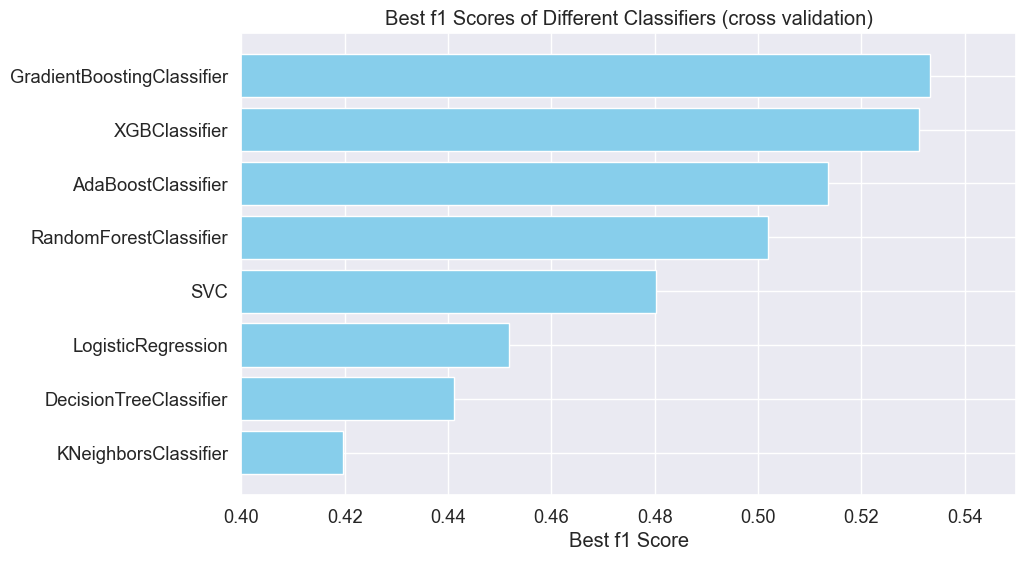

In [167]:
import matplotlib.pyplot as plt

# Data
classifiers = list(results_allmodels_df_sorted.index)
best_scores = list(results_allmodels_df_sorted['Best Score'])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(classifiers, best_scores, color='skyblue')
plt.xlabel('Best f1 Score')
plt.title('Best f1 Scores of Different Classifiers (cross validation)')
plt.xlim(0.4, 0.55)  # Adjust limits if needed
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()


#### As observed, the GradientBoost classifier outperforms other machine learning algorithms in terms of the F1 score during cross-validation analysis. 

#### Consequently, we have selected this algorithm as our final choice. We will further explore additional parameters to enhance its performance.

# More Focus GradientBoostingClassifier

In [55]:
models = { "GradientBoostingClassifier": GradientBoostingClassifier(random_state=10) }

param_grids = {
"GradientBoostingClassifier": {
    "gradientboostingclassifier__n_estimators": [50,100,150],
    "gradientboostingclassifier__learning_rate": [0.001,0.01,0.05, 0.1, 0.2],
    "gradientboostingclassifier__max_depth": [2,3,4],
    "gradientboostingclassifier__min_samples_split": [2, 5, 10],
    "gradientboostingclassifier__subsample": [0.9, 1.0],
    "gradientboostingclassifier__min_samples_leaf": [3, 4, 5]
}
}

save_models =True
output_directory =r"research\notebook_models"
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) 
scoring= "f1"
balancer = RandomOverSampler(random_state=42)


In [56]:
results_RandomOverSampler_more_params= evaluate_models(models, X_train, y_train, X_test, y_test, preprocessor=preprocessor, balancer=balancer, param_grids=param_grids,
                 kf=kf, scoring=scoring, save_models=True, output_directory=output_directory)

dict_keys(['columntransformer', 'randomoversampler', 'gradientboostingclassifier'])


In [57]:
# each model is a row and each metric is a column
results_RandomOverSampler_more_params_df = pd.DataFrame.from_dict(results_RandomOverSampler_more_params, orient='index')
results_RandomOverSampler_more_params_df

,Best Hyperparameters,Best Score,Train Accuracy,Train F1 Score,Train Precision,Train Recall,Train Roc Auc,Test Accuracy,Test F1 Score,Test Precision,Test Recall,Test Roc Auc,Saved Model Filepath
GradientBoostingClassifier,{'gradientboostingclassifier__learning_rate': ...,0.542323,0.808706,0.615966,0.514601,0.767059,0.793088,0.813333,0.593023,0.525773,0.68,0.763333,C:\Users\layeg\Desktop\GitHub\Holland_Barret\r...


In [168]:
results_RandomOverSampler_more_params_df['Best Hyperparameters'][0]

{'gradientboostingclassifier__learning_rate': 0.05,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__min_samples_leaf': 4,
 'gradientboostingclassifier__min_samples_split': 2,
 'gradientboostingclassifier__n_estimators': 150,
 'gradientboostingclassifier__subsample': 0.9}

## Evaluation on test set


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      3400
           1       0.51      0.77      0.62       850

    accuracy                           0.81      4250
   macro avg       0.72      0.79      0.74      4250
weighted avg       0.85      0.81      0.82      4250


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       600
           1       0.53      0.68      0.59       150

    accuracy                           0.81       750
   macro avg       0.72      0.76      0.74       750
weighted avg       0.84      0.81      0.82       750



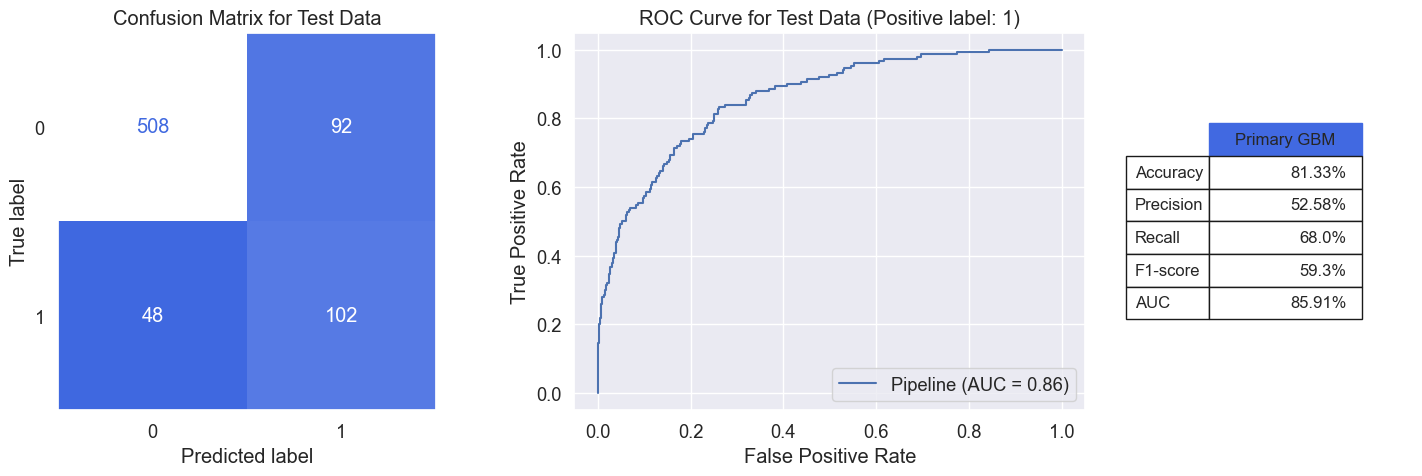

In [111]:
model_path = results_RandomOverSampler_more_params_df['Saved Model Filepath'][0]
model = joblib.load(model_path)
model_evaluation(model, X_train,X_test, y_train, y_test, 'Primary GBM')


## Feature Importance

In [126]:

# Get column names after one hot encoding
X_train_transformed = preprocessor.fit_transform(X_train)
# Get the column names for the transformed features
column_names = preprocessor.get_feature_names_out()

model.named_steps['gradientboostingclassifier'].feature_importances_
feature_names =X.columns
data = dict(zip(column_names, model.named_steps['gradientboostingclassifier'].feature_importances_))

categorical_totals = {}
numeric_features = {}

for key, value in data.items():
    if key.startswith('categorical__'):
        category = key.split('__')[1]  # Extracting the categorical feature name
        category_root = category.split('_')[0]  # Extracting the root category name
        if category_root in categorical_totals:
            categorical_totals[category_root] += value
        else:
            categorical_totals[category_root] = value
    else:
        numeric_key = key.split('__')[1]  # Extracting the numeric feature name
        numeric_features[numeric_key] = value
        
feature_importances_dic ={**categorical_totals, **numeric_features}
#sort
feature_importances_dic = dict(sorted(feature_importances_dic.items(), key=lambda item: item[1]))
feature_importances_dic = {key: round(value, 3) for key, value in feature_importances_dic.items()}


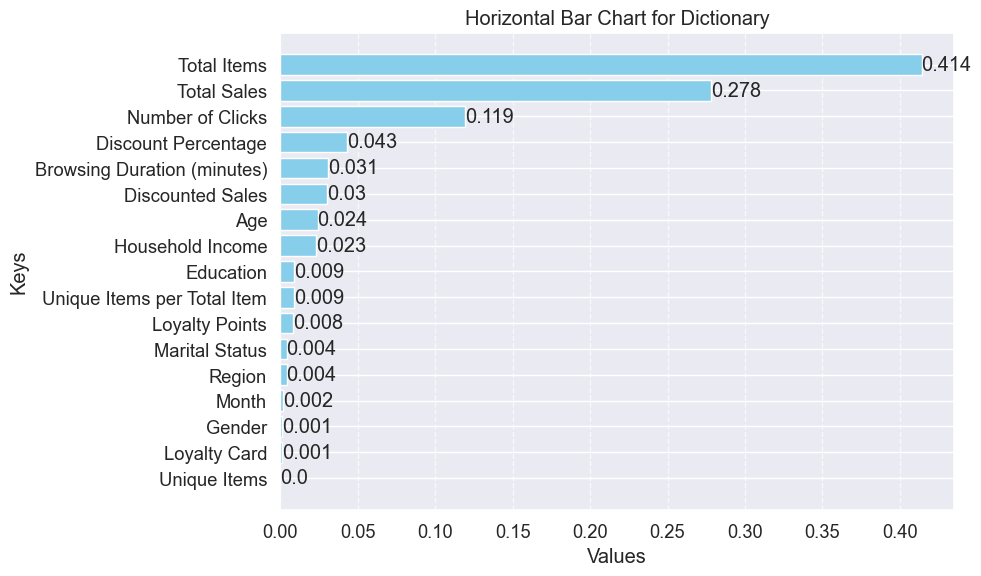

In [127]:
visualize_dictionary(feature_importances_dic)

# Train on the Entire Dataset for Prediction on New Transactions
#### Given the dataset and an additional CSV file named "new_transactions.csv" containing 1000 transactions whose completeness status was lost during a system failure, we aim to predict their completeness status. To achieve this, we will train a new model using the entire dataset (without performing a train-test split) with the best parameters obtained from the grid search CV in the previous section. This approach will provide our model with 15% more data and potentially improve its performance.

In [130]:
# Transformation of the dataset
df_new_transactions = pd.merge(new_transactions, customer_data, on='Customer ID', how='left')

# new features
df_new_transactions['Discount Percentage'] = ((df_new_transactions['Total Sales'] - df_new_transactions['Discounted Sales']) / df_new_transactions['Total Sales']) * 100
df_new_transactions['Unique Items per Total Item'] = df_new_transactions['Unique Items'] / df_new_transactions['Total Items']
df_new_transactions['Month'] = pd.to_datetime(df_new_transactions['Date']).dt.month
# drop columns
df_new_transactions.drop(columns=['Customer ID', 'Transaction ID','Date'], inplace=True)
# change type of columns
df_new_transactions['Month'] = df_new_transactions['Month'].astype(str)
df_new_transactions['Loyalty Card'] = df_new_transactions['Loyalty Card'].astype(str)



In [144]:
# Splitting X and y (entire data)
X_train= df.drop('Incomplete Transaction', axis=1)
y_train = df['Incomplete Transaction']

X_train_pro= preprocessor.fit_transform(X_train)


balancer = RandomOverSampler(random_state=42)

X_train_re, y_train_re =balancer.fit_resample(X_train_pro, y_train)


GBM_params = results_RandomOverSampler_more_params_df['Best Hyperparameters'][0] # these came from previous gridsearch cross validation 

GBM = GradientBoostingClassifier(
    n_estimators=GBM_params['gradientboostingclassifier__n_estimators'],
    learning_rate=GBM_params['gradientboostingclassifier__learning_rate'],
    max_depth=GBM_params['gradientboostingclassifier__max_depth'],
    min_samples_split=GBM_params['gradientboostingclassifier__min_samples_split'],
    min_samples_leaf=GBM_params['gradientboostingclassifier__min_samples_leaf'],
    subsample=GBM_params['gradientboostingclassifier__subsample']

)

GBM.fit(X_train_re, y_train_re)

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=4,
                           n_estimators=150, subsample=0.9)

In [145]:
# prediction 
X_new = df_new_transactions
X_new_pro= preprocessor.transform(X_new)
y_new_pred = GBM.predict(X_new_pro)


In [146]:
import pandas as pd

# Assuming y_new_pred is a 1-dimensional array containing the predictions
predictions_df = pd.DataFrame({'Prediction': y_new_pred})

# Save predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


# More experiments on MLflow 

In [100]:
# Splitting X and y for all Experiments
X= df.drop('Incomplete Transaction', axis=1)
y = df['Incomplete Transaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.15, random_state = 42)
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.15, random_state = 42)


X_train_pro= preprocessor.fit_transform(X_train)
X_val_pro = preprocessor.transform(X_val)
X_test_pro = preprocessor.transform(X_test)

balancer = RandomOverSampler(random_state=42)

X_train_re, y_train_re =balancer.fit_resample(X_train_pro, y_train)


GBM_params ={
 'gradientboostingclassifier__learning_rate': 0.04,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__min_samples_leaf': 4,
 'gradientboostingclassifier__min_samples_split': 2,
 'gradientboostingclassifier__n_estimators': 100,
 'gradientboostingclassifier__subsample': 0.8
 } # these came from previous gridseach cross validation 

GBM = GradientBoostingClassifier(
    n_estimators=GBM_params['gradientboostingclassifier__n_estimators'],
    learning_rate=GBM_params['gradientboostingclassifier__learning_rate'],
    max_depth=GBM_params['gradientboostingclassifier__max_depth'],
    min_samples_split=GBM_params['gradientboostingclassifier__min_samples_split'],
    min_samples_leaf=GBM_params['gradientboostingclassifier__min_samples_leaf'],
    subsample=GBM_params['gradientboostingclassifier__subsample']

)

GBM.fit(X_train_re, y_train_re)


GradientBoostingClassifier(learning_rate=0.04, min_samples_leaf=4,
                           subsample=0.8)

In [101]:
#save 
model_name = "GBClassifier"
output_directory =r"research\notebook_models"
current_datetime = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"{model_name.replace(' ', '_')}_{current_datetime}_best_model.joblib"
model_filepath = os.path.join(output_directory, model_filename)
joblib.dump(GBM, model_filepath)

['C:\\Users\\layeg\\Desktop\\GitHub\\Holland_Barret\\research\\notebook_models\\GBClassifier_20240227_133312_best_model.joblib']

In [102]:
os.environ["MLFLOW_TRACKING_URI"]="https://dagshub.com/layeghmorteza/Holland_Barret.mlflow"
os.environ["MLFLOW_TRACKING_USERNAME"]="layeghmorteza"
os.environ["MLFLOW_TRACKING_PASSWORD"]="47ea8e5519d9fbb79e294bf09a018544a39aa22d"

In [103]:

def log_into_mlflow(mlflow_uri,model_path,X_test,y_test,params):

    model = joblib.load(model_path)

    mlflow.set_registry_uri(mlflow_uri)
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    with mlflow.start_run():

        predicted_qualities = model.predict(X_test)

        (acc, f1, precision,recall,roc_auc) = evaluate_clf(y_test, predicted_qualities)
        
        # Saving metrics as local
        scores = {"acc": acc, "f1": f1, "precision": precision, "recall": recall, "roc_auc": roc_auc}
        #save_json(path=Path(self.config.metric_file_name), data=scores)

        mlflow.log_params(params)

        mlflow.log_metric("acc", acc)
        mlflow.log_metric("f1", f1)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("roc_auc", roc_auc)
    

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(model, "model", registered_model_name="GradientBoostingClassifier")
        else:
                mlflow.sklearn.log_model(model, "model")


In [104]:

mlflow_uri="https://dagshub.com/layeghmorteza/Holland_Barret.mlflow"

log_into_mlflow(mlflow_uri, model_filepath, X_val_pro, y_val, GBM_params)

Registered model 'GradientBoostingClassifier' already exists. Creating a new version of this model...
2024/02/27 13:33:19 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: GradientBoostingClassifier, version 8
Created version '8' of model 'GradientBoostingClassifier'.



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       722
           1       0.81      0.74      0.77       722

    accuracy                           0.78      1444
   macro avg       0.78      0.78      0.78      1444
weighted avg       0.78      0.78      0.78      1444


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       510
           1       0.44      0.75      0.55       128

    accuracy                           0.76       638
   macro avg       0.68      0.75      0.69       638
weighted avg       0.83      0.76      0.78       638



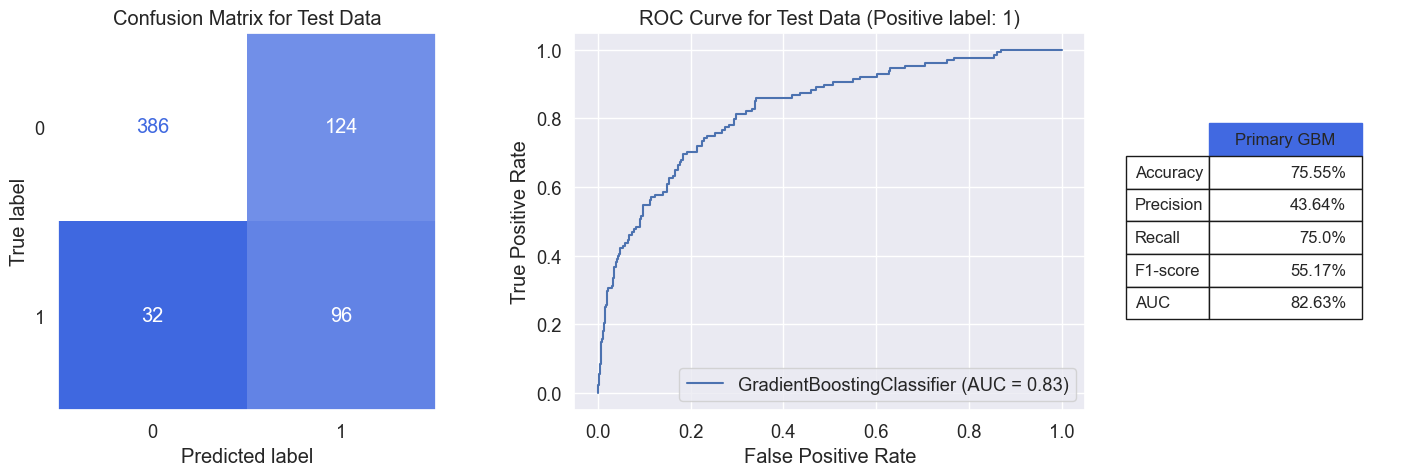

In [105]:
model_evaluation(GBM, X_train_re, X_val_pro, y_train_re, y_val, 'Primary GBM')
